In [1]:
## 2024 aPC flavor & hedonic testing

## import packages

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.ticker import MaxNLocator
from matplotlib import gridspec
import seaborn as sns
import os
import glob
import datetime
import numpy as np
import pandas as pd
import math
from random import randrange
from random import randint
from tqdm import tqdm
import dabest
import sys
from BaselineRemoval import BaselineRemoval
import pynapple as nap
from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# %config InlineBackend.figure_format = 'retina'

import sys
sys.path.append('/Users/hunglo/Documents/python_codes/')
import binge



/opt/anaconda3/envs/pynapple/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/envs/pynapple/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/envs/pynapple/lib/python3.11/site-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


In [2]:
## plotting settings

## create color map
my_color_map = ['#56b4e9',
                '#e69f00',
                '#009e73',
                '#f0e442',
                '#0072b2',
                '#d55e00',
                '#cc79a7']
# convert to sns plotting rgb
my_color_map = sns.color_palette(my_color_map)

# 20% lighter 
my_color_map_grey_light = ['#B3B3B3',
                      '#89E7FF',
                      '#FFB91A',
                      '#33D1A6',
                      '#FFFF75',
                      '#33A5E5',
                      '#FF9133',
                      '#FFACDA']
my_color_map_grey_light = sns.color_palette(my_color_map_grey_light)

my_color_map_grey = ['#808080',
                      '#56b4e9',
                      '#e69f00',
                      '#009e73',
                      '#f0e442',
                      '#0072b2',
                      '#d55e00',
                      '#cc79a7']
# convert to sns plotting rgb
my_color_map_grey = sns.color_palette(my_color_map_grey)

color_map_black_grey = ['#000000','#808080']
color_map_black_grey = sns.color_palette(color_map_black_grey)

## font setting
plt.rcParams["font.family"] = 'Arial'
plt.rcParams.update({'font.size': 8})

# plt.rcParams["font.family"] = 'Helvetica Neue'

# ## set all figure background to white
# plt.rcParams['axes.facecolor']='white'
# plt.rcParams['savefig.facecolor']='white'

def save_plot_pdf(plot_name):
    fig_output_folder = '/Users/hunglo/Documents/inscopix_csv/fig_output/'
    kwargs = {"facecolor":"white","dpi":300,"bbox_inches":"tight"}
    # kwargs = {"facecolor":"white","dpi":300} # no tight arg here, to prevent fontsize changes
    plt.savefig(f'{fig_output_folder}{plot_name}.pdf',**kwargs)

def get_auto_colors(n_colors):
    auto_color_map_cat = sns.color_palette("husl", n_colors)
    return auto_color_map_cat

def correct_baseline_modploy(df_accepted):
    input_array = df_accepted.values
    polynomial_degree=2 #only needed for Modpoly and IModPoly algorithm
    baseObj=BaselineRemoval(input_array)
    Modpoly_output=baseObj.ModPoly(polynomial_degree)
    df_corrected = pd.DataFrame(data=Modpoly_output,index=df_accepted.index,columns=[' C1'])
    return df_corrected

def load_mouse_info_from_meta_data():
  import pandas as pd
  # import chardet
  filename = '/Users/hunglo/Documents/inscopix_csv/Recordings_overview_updated_old.csv'
  filename = '/Users/hunglo/Documents/inscopix_csv/Recordings_overview_updated_new.csv' # include OFC

  # url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTPyLFWYecnKapIC0TWEH5w_VZVyJYsDVCt0rfG73266Dm4XWtf7IwuIBbTV3TcYVABa8UEkcCMqDza/pub?gid=143829771&single=true&output=csv"
  # with open(filename, 'rb') as f:
  #     result = chardet.detect(f.read())  # or readline if the file is large

  # # print(result)
  # df_overview = pd.read_csv(filename, encoding=result['encoding'],on_bad_lines='skip',sep=';',skiprows=2)


  df_overview = pd.read_csv(filename,skiprows=2)
  df_overview = df_overview[df_overview['Imaging?']==True] ## Only load those sessions with recordings.
  mouse_id_list = df_overview['Mouse ID'].unique()
  mouse_id_list = mouse_id_list[~pd.isnull(mouse_id_list)]
  mouse_id_list = sorted(mouse_id_list)
  return df_overview, mouse_id_list

def get_metadata(mouse_id, date):
    df_overview, _ = load_mouse_info_from_meta_data()
    select_overview = df_overview[df_overview['Mouse ID'] == mouse_id].copy()
    select_overview = select_overview[select_overview['Recording date']=='20'+date]


    Pump1_solution = select_overview['Flavor 1'].to_numpy()[0].lower()
    Pump2_solution = select_overview['Flavor 2'].to_numpy()[0].lower()
    Food_deprivation = select_overview['Food_deprived'].to_numpy()[0].lower()
    if 'OFC' in select_overview['Genotype'].to_numpy()[0]:
        Genotype = 'OFC' # make this condition first, so that OFC won't be classified as just CaMK2
    elif 'CaMK2a' in select_overview['Genotype'].to_numpy()[0]:
        Genotype = 'CaMK2'
    elif 'iSeroSnFR' in select_overview['Genotype'].to_numpy()[0]:
        Genotype = 'iSeroSnFR'
    elif 'dLight' in select_overview['Genotype'].to_numpy()[0]:
        Genotype = 'dLight'
    elif 'S2GC' in select_overview['Genotype'].to_numpy()[0]:
        Genotype = 'S2GC'
    elif 'S2' in select_overview['Genotype'].to_numpy()[0]:
        Genotype = 'S2'
    elif 'GC' in select_overview['Genotype'].to_numpy()[0]:
        Genotype = 'GC'
    else:
        Genotype = select_overview['Genotype'].to_numpy()[0]
    mouse_name = select_overview['Mouse Name'].to_numpy()[0]
    
    return Pump1_solution, Pump2_solution, Food_deprivation, Genotype, mouse_name

df_overview, mouse_id_list = load_mouse_info_from_meta_data()
df_overview.head()
# df_overview['Mouse ID'].unique()


Mouse Name Mouse ID           Genotype Tg/viral Session  \
1  Karl-Heinz Leopold  BES0224  CaMK2a-cre; Ai93D       Tg       2   
2  Karl-Heinz Leopold  BES0224  CaMK2a-cre; Ai93D       Tg       3   
3  Karl-Heinz Leopold  BES0224  CaMK2a-cre; Ai93D       Tg       4   
4  Karl-Heinz Leopold  BES0224  CaMK2a-cre; Ai93D       Tg       5   
5  Karl-Heinz Leopold  BES0224  CaMK2a-cre; Ai93D       Tg       6   

  Recording date  Body_weight  Food_intake_before Food_intake_after  \
1     2020.08.07        36.00                4.00               NaN   
2     2020.08.11        34.13                 NaN              4.27   
3     2020.08.12        33.69                4.27              4.06   
4     2020.08.13        33.47                4.06              3.86   
5     2020.08.14        33.24                3.86              4.73   

  Food_deprived  ... Unnamed: 27 Unnamed: 28 Unnamed: 29 Unnamed: 30  \
1          Mild  ...         NaN         NaN         NaN         NaN   
2          Mild  ...         NaN         NaN         NaN         NaN   
3          Mild  ...         NaN         NaN         NaN         NaN   
4          Mild  ...         NaN         NaN         NaN         NaN   
5          Mild  ...         NaN         NaN         NaN         NaN   

   Unnamed: 31 Unnamed: 32 Unnamed: 33  Unnamed: 34 Unnamed: 35 Unnamed: 36  
1          NaN         NaN         NaN          NaN         NaN         NaN  
2          NaN         NaN         NaN          NaN         NaN         NaN  
3          NaN         NaN         NaN          NaN         NaN         NaN  
4          NaN         NaN         NaN          NaN         NaN         NaN  
5          NaN         NaN         NaN          NaN         NaN         NaN  

[5 rows x 37 columns]

In [3]:
### function block, need to move to "binge.py" later, but will keep them here

##### functions for data processing #####

def norm_ca(df):
    df_norm = pd.DataFrame([])
    for idx,cell in enumerate(df.columns):
        ## normalize to 0-1
        df_max=np.max(df[cell])
        df_min=np.min(df[cell])
        df_norm[cell] = (df[cell]-df_min)/(df_max-df_min)
    return df_norm

def ca2_plot(df,scale=5,cell_idx=None,**kwargs):
    ## scale here is just to help viz
    if cell_idx == None:
        for idx,cell in enumerate(df.columns):
            plt.plot(df[cell]*scale+idx,lw=1,**kwargs)
    else:
        for idx,cell_ in enumerate(list(cell_idx)):
            ## normalize to 0-1
            cell = df.columns[idx]
            plt.plot(df[cell]*scale+idx,lw=1,**kwargs)

 
# def detect_binge_bout(Pump1,interval=3):
#     """
#     this is a old one
#     """
#     Pump1 = np.pad(Pump1, (1, 1), 'constant', constant_values=(0,Pump1.max()+interval*10)) # so the last value is more than interval
#     diff = Pump1[1:]-Pump1[:-1]
#     gap = diff>interval # binary data
#     idx = np.where(gap == 1) # idx == 1
#     start_concat, end_concat = [],[]
#     for idx_ in idx:
#         start_concat.append(Pump1[1:][idx_])
#         end_concat.append(Pump1[:][idx_])
#     start_concat = start_concat[0][:-1] # remove empty starting
#     end_concat = end_concat[0][1:] # remove empty ending

#     binge_epoch = nap.IntervalSet(start_concat,end_concat)

#     ## run through the rows to make sure there isn't no duration epochs
#     ## note this should be taken care of from the pynapple package but somehow it isn't working properly 
#     binge_epoch_clean = pd.DataFrame(data=[], columns=['start','end'])
#     for n in range(binge_epoch.shape[0]):
#         for x,y in binge_epoch[n:n+1].values:
#             # print(x,y)
#             # if x!= y: ## this is the old alg
#             if y-x >3: # at least 3 sec bout
#             # if True:
#                 binge_epoch_clean = pd.concat([binge_epoch_clean,binge_epoch[n:n+1]])
#     binge_epoch_clean = nap.IntervalSet(binge_epoch_clean['start'],binge_epoch_clean['end'], time_units='s')
#     return binge_epoch_clean

## burst detection function from other ppl, adapted from the following link
## https://spikesandbursts.wordpress.com/2023/08/24/patch-clamp-data-analysis-in-python-bursts/
def burst_detection(df, spike_times,
                    n_spikes, 
                    max_isi, 
                    # min_duration,  # Optional
                    min_ibi):
     
    """
    Detects bursts in spike data based on spike times, 
    by identifying consecutive spikes that fulfill the criteria of:
    minimum number of spikes, maximum interspike interval, and minimum interburst interval.
     
    Arguments: 
        df: DataFrame with spike data.
        spike_times: Column name for spike positions.
        spike_amplitudes: Column name for spike amplitudes.
        spike_peaks: Column name for spike peak amplitudes. 
        n_spikes: Minimum number of spikes within a burst.
        max_isi: Max interspike interval within the burst.
        min_duration: Minimum burst duration.
        min_ibi: Minimum interburst interval (optional).
         
    Returns:
        DataFrame with burst information.
    """
     
    df = df.sort_values(by=spike_times)  # Sort DataFrame by spike positions
    df['burst'] = np.nan  # Create column for burst labels
    burst_num = 0        # Initialize burst number
    burst_start = None   # Initialize burst start position
    last_spike = None    # Initialize last spike position
 
    for i, row in df.iterrows():  # Loop through DataFrame rows 
        spike = row[spike_times]   # Extract the spike position 
         
        if burst_start is None:   # It checks if it is the first spike 
            burst_start = spike   # It marks the current spike position as the start of a burst
            last_spike = spike    # Update the last_spike position to the current spike position
            df.at[i, 'burst'] = burst_num   # Assign burst number
        elif spike - last_spike <= max_isi:  # It checks if the current spike is within max isi
            df.at[i, 'burst'] = burst_num  
            last_spike = spike 
        elif spike - last_spike > min_ibi:  # It checks if the interburst interval has been reached
            burst_num += 1 
            burst_start = spike 
            last_spike = spike  
            df.at[i, 'burst'] = burst_num
     
    # Filter bursts with less than min_spikes
    df = df[df.groupby('burst')[spike_times].transform('count') >= n_spikes]
     
    # Filter burst shorter that min_duration (min_duration parameter)
    # df = df[df.groupby('burst')[spike_times].transform('max') 
    #         - df.groupby('burst')[spike_times].transform('min')
    #         >= min_duration]
     
    # Calculate burst information by aggregating single spike information
    bursts = df.groupby('burst')[spike_times].agg(['min', 'max', 'count'])
    bursts.columns = ['burst_start', 'burst_end', 'spikes_in_bursts']
    bursts['burst_length'] = bursts['burst_end'] - bursts['burst_start']
    # bursts['avg_spike_amplitude'] = df.groupby('burst')[spike_amplitudes].mean()
    # bursts['avg_spike_peaks'] = df.groupby('burst')[spike_peaks].mean()  
    bursts['spikes_frequency'] = bursts['spikes_in_bursts'] / bursts['burst_length']
    bursts = bursts.reset_index()
    bursts['burst_number'] = bursts.index + 1
     
    return bursts[['burst_number', 'burst_start', 'burst_end', 
                   'burst_length', 'spikes_in_bursts', 'spikes_frequency']]

## new detection function that used the above function
def detect_binge_bout(Pump_event, n_pumps, max_isi, min_ibi):
    df = pd.DataFrame(Pump_event,columns=['spike_times'])
    binge_df = burst_detection(df=df,spike_times='spike_times', 
                             n_spikes = n_pumps,  
                             max_isi = max_isi,
                             min_ibi = min_ibi)
    binge_df = binge_df.rename(columns={"burst_number":"binge_bout_idx",
                                    "burst_start":"start",
                                    "burst_end":"end",
                                    "burst_length":"bout_duration",
                                    "spikes_in_bursts":"deliveries_in_bout",
                                    "spikes_frequency":"delivery_frequency"})
    
    return binge_df, nap.IntervalSet(start= binge_df['start'],end=binge_df['end'])

def slow_feeding_event_clean_up(slow_milk_ts, lick_event):
    slow_milk_ts_clean  = np.array([t for t in slow_milk_ts if (lick_event[lick_event>t][0]-t) <4]) # check there is lick event after the delivery in 4 sec
    slow_milk_ts_clean = np.pad(slow_milk_ts_clean,(0,1),'constant', constant_values=(4000,))
    slow_milk_ts_clean = np.sort(slow_milk_ts_clean)
    slow_milk_ts_clean  = np.array([x for x,y in zip(slow_milk_ts_clean[:-1],slow_milk_ts_clean[1:]) if (y-x) > 3.5]) # exclude slow feeding events that come from incomplete binge feeding
    return slow_milk_ts_clean


## downsample Ca2+ data to 10 Hz all together for easier processing afterward?
def downsample(df_accepted):
    ## add a condition here to check if it's already 10 hz
    from math import isclose
    a = df_accepted.index[1]-df_accepted.index[0] # get diff
    b = 0.05
    print(f'frame diff: {round(a,5)}')
    if isclose(a, b, abs_tol=1e-3):
        print('20 Hz -> 10 Hz')
        # if df_accepted.index[1]-df_accepted.index[0]
        from scipy import signal
        sample_num = int(df_accepted.shape[0]/2)
        df_downsampled =  pd.DataFrame(signal.resample(df_accepted, sample_num),index=df_accepted.index[::2][0:sample_num],columns=df_accepted.columns)
        return df_downsampled
    else:
        print('already 10 Hz')
        return df_accepted


def get_PETH_dict(df_accepted,slow_milk_ts_clean):
    ## now generate PSTH for each cell
    windowsize = 10 # sec, before + after
    half_window = int(windowsize/2)
    num_bins = windowsize * 10 # based on 10 Hz
    # t_scale = np.linspace(-5,5,num_bins)
    PETH_trace_milk = {} 

    cellset = df_accepted.columns
    for cell in cellset:
        PETH_trace = np.zeros([len(slow_milk_ts_clean),num_bins])
        for trial, time in enumerate(slow_milk_ts_clean):
            value = df_accepted[cell][time-half_window:time+half_window].values

            while len(value)<100:
                print(trial,time)
                print('add nan to last part')
                value = np.pad(value, (0, 1), 'constant', constant_values=(np.nan,np.nan))
            else:
                PETH_trace[trial,:] = value[0:num_bins] # keep the slicer here so in case we got one more value here
        PETH_trace_milk[cell] = PETH_trace
    return PETH_trace_milk


def get_PETH_binge(df_accepted,binge_epoch):
    ## now generate PSTH for each cell
    windowsize = 10 # sec, before + after
    half_window = int(windowsize/2)
    num_bins = windowsize * 10 # based on 10 Hz
    # t_scale = np.linspace(-5,5,num_bins)
    PETH_trace_binge_on = {} 
    PETH_trace_binge_off = {}

    cellset = df_accepted.columns

    for cell in cellset:
        PETH_trace = np.zeros([binge_epoch.shape[0],num_bins])
        for trial, time in enumerate(binge_epoch['start']):
            value = df_accepted[cell][time-half_window:time+half_window].values
            while len(value)<100:
                print(trial,time)
                print('add nan to last part')
                value = np.pad(value, (0, 1), 'constant', constant_values=(np.nan,np.nan))
            else:
                PETH_trace[trial,:] = value[0:num_bins] # keep the slicer here so in case we got one more value here
        PETH_trace_binge_on[cell] = PETH_trace

        PETH_trace = np.zeros([binge_epoch.shape[0],num_bins])
        for trial, time in enumerate(binge_epoch['end']):
            value = df_accepted[cell][time-half_window:time+half_window].values
            while len(value)<100:
                print(trial,time)
                print('add nan to last part')
                value = np.pad(value, (0, 1), 'constant', constant_values=(np.nan,np.nan))
            else:
                PETH_trace[trial,:] = value[0:num_bins] # keep the slicer here so in case we got one more value here
        PETH_trace_binge_off[cell] = PETH_trace
    return PETH_trace_binge_on,PETH_trace_binge_off

## align baseline to 0 for individual trial
def baseline_correct(PETH, window=1):
    for key in PETH.keys():
        matrix = PETH.get(key)
        for trial in range(matrix.shape[0]):
            matrix[trial,:] -= np.mean(matrix[trial,50-int(window*10):50]) # baseline mean centered (1 sec before event time)
        PETH[key] = matrix
    return PETH


def correct_baseline_modploy(df_accepted):
    """
    This is used for correcting bleaching on NM imaging
    """
    input_array = df_accepted.values
    polynomial_degree=2 #only needed for Modpoly and IModPoly algorithm
    baseObj=BaselineRemoval(input_array)
    Modpoly_output=baseObj.ModPoly(polynomial_degree)
    df_corrected = pd.DataFrame(data=Modpoly_output,index=df_accepted.index,columns=[' C1'])
    return df_corrected

#### lick event related ####

def load_lick_event(file_path):
    # dat = load_npy()
    dat = np.load(file_path, allow_pickle=True)
    PETH_lick_binge  = dat.item().get('PETH_lick_binge')
    PETH_lick_slow   = dat.item().get('PETH_lick_slow')
    PETH_lick_slow_single = dat.item().get('PETH_lick_slow_single')
    return PETH_lick_binge,PETH_lick_slow,PETH_lick_slow_single

def lick_df_sns(PETH_lick_binge_concat):
    PETH_lick_binge_concat_sns = PETH_lick_binge_concat.T.reset_index().melt(value_name='Lick',var_name='Time (sec)',id_vars='index')
    PETH_lick_binge_concat_sns = PETH_lick_binge_concat_sns.rename(columns={'index':'Trial'})
    return  PETH_lick_binge_concat_sns


def load_peth_pump_event(file_path):
    dat = np.load(file_path, allow_pickle=True)
    PETH_pump_binge  = dat.item().get('PETH_pump_binge')
    PETH_pump_slow   = dat.item().get('PETH_pump_slow')
    return PETH_pump_binge,PETH_pump_slow

def pump_df_sns(PETH_lick_binge_concat):
    PETH_lick_binge_concat_sns = PETH_lick_binge_concat.T.reset_index().melt(value_name='Pump delivery',var_name='Time (sec)',id_vars='index')
    PETH_lick_binge_concat_sns = PETH_lick_binge_concat_sns.rename(columns={'index':'Trial'})
    return  PETH_lick_binge_concat_sns

def deco_scale(data,**kws):
    ax = plt.gca()
    ax.set_yticks([0,5,10])
    ax.set_xlabel('Time from feeding onset (sec)',labelpad=10)
    sns.despine()
    ax.set_xlim(xmin=-3)

##### auroc related #####

def cal_auroc(PETH, baseline_window=1,steps=20):
  """
  PETH: 3D np array of neuronal matrix, ordered with neurons, trials, timestamps
  baseline_window: * sec before pump delivery, default is 1 sec

  """
  from sklearn.metrics import auc

  auc_total_all_cell       = np.zeros((PETH.shape[0],PETH.shape[2]))
  frate = 10 # all 10 Hz

  data = PETH
  for idx in range(data.shape[0]):
        if idx%50==0:
          print(f'now at neuron: {idx}')
        
        baseline = data[idx,:,50-baseline_window*frate:50].flatten()
        auc_total = []
        for i in range(data.shape[2]):
          stimulus = data[idx,:,i]
          pool = [*baseline, *stimulus]
          steps = steps
          criteria = [min(pool) + (j*(max(pool)-min(pool))/steps) for j in range(steps)]
          criteria[0] = criteria[0] - 1e-12 # modify the min value to slighter lesser value, so baseline/stimulus will be larger than the min of criteria
          pbase = []
          pstim = []
          # Calculate P(above threshold) for each cutoff
          for cri in criteria:
            pbase.append(sum(baseline > cri)/len(baseline))
            pstim.append(sum(stimulus > cri)/len(stimulus))
          auc_ = auc(x = pbase, y = pstim)
          auc_total.append(auc_)
        auc_total_all_cell[idx,:] = auc_total

  return auc_total_all_cell

## make a classification function here based on auROC
def checkConsecutive(l,n=3):
    n = n-1 # diff will be one less than all elements in the list
    return (sum(np.diff(sorted(l)) == 1) >= n) 

def cell_class(auroc,window=2,threshold_sd=2):
   idx_positive = []
   idx_negative = []
   frate = 10
   for idx in range(auroc.shape[0]):
    threshold_high = np.mean(auroc[idx,40:50]) + np.std(auroc[idx,40:50])*threshold_sd
    auroc_temp = auroc[idx].copy()
    j_temp = []
    for j in range(50,50+int(window*frate)):  # Only look at first 2 sec after delivery (the window size)
        if auroc_temp[j] > threshold_high:
           j_temp.append(j)
    if j_temp !=[]:
        if checkConsecutive(j_temp,n=3) == True:
           idx_positive.append(idx)
      # print('# {} is responding to milk'.format(idx))
   for idx in range(auroc.shape[0]):
    threshold_high = np.mean(auroc[idx,40:50]) - np.std(auroc[idx,40:50])*threshold_sd
    auroc_temp = auroc[idx].copy()
    j_temp = []
    for j in range(50,50+int(window*frate)):  # Only look at first 2 sec after delivery (the window size)
        if auroc_temp[j] < threshold_high:
           j_temp.append(j)
    if j_temp !=[]:
        if checkConsecutive(j_temp,n=3) == True:
           idx_negative.append(idx)
      # print('# {} is responding to milk'.format(idx))
   ## make idx for non-responding neurons
   cellnum = auroc.shape[0]
   idx_non = []
   idx_non = [i for i in range(cellnum) if i not in idx_positive and i not in idx_negative]
   return idx_positive, idx_negative, idx_non

##### function for behavioral clustering (selecting recording sessions based on overall Ensure consumption) #####

def select_sessions(df_estimate_concat, Celltype='apc_camk2', fasted = False, anosmic = False, window_size = '0_4'):
    data = df_estimate_concat[df_estimate_concat['fasted'] == fasted]
    data = data[data['anosmic']==anosmic]
    data = data[data['window_size']==window_size]
    data = data[data['Celltype']==Celltype]
    print(data.shape)

    ## separate data by behavior ranking (%) & by absolute milk consumption values
    data['milk_rank_pct'] = data['milk_consumption'].rank(pct=True)
    data['tertile']       = pd.qcut(data['milk_rank_pct'],   q = 3,    labels=['bottom','middle','top'])
    data['quartile']      = pd.qcut(data['milk_rank_pct'],   q = 4,    labels=['bottom','l-middle','h-middle','top'])
    data['tertile_abs']   = pd.cut(data['milk_consumption'], bins = 3, labels=['bottom','middle','top'])
    data['quartile_abs']  = pd.cut(data['milk_consumption'], bins = 4, labels=['bottom','l-middle','h-middle','top'])

    cohensd_table = data.copy()

    return cohensd_table

def get_npy_path(mouse_id,date):
    file_folder = '/Users/hunglo/Documents/inscopix_csv/processed_npy/'
    extension = 'npy'
    os.chdir(file_folder)
    result = sorted(glob.glob('*.{}'.format(extension)))
    result = [r for r in result if mouse_id in r]
    if '.' in date:
        datewithdot = date
    else:
        datewithdot = f'{date[0:2]}.{date[2:4]}.{date[4:6]}'
    result = [r for r in result if datewithdot in r]
    # print(result)
    file_path = os.path.join(file_folder,result[0])
    return file_path

def concat_PETH_binge(select_data,mouse_id_list):
    PETH_binge_on_concat = np.zeros([1,100])
    # print(PETH_binge_on_concat.shape)
    for mouse_id in mouse_id_list:
        # print(mouse_id)
        date_list = select_data[select_data['mouse_id']==mouse_id]['date'].values.astype('str')
        for date in date_list:
            # print(f'>{date}')
            PETH_binge_on,_,_,_,_,_,_,_,_ = load_npy(get_npy_path(mouse_id,date))
            PETH_avg = np.mean(PETH_binge_on,axis=1) # trial average
            # print(PETH_avg.shape[0])
            PETH_binge_on_concat = np.vstack([PETH_binge_on_concat,PETH_avg])
    # print(PETH_binge_on_concat.shape)
    PETH_binge_on_concat = PETH_binge_on_concat[~np.all(PETH_binge_on_concat == 0, axis=1)] # remove first row
    # print(PETH_binge_on_concat.shape)
    return PETH_binge_on_concat

def np2df_long(PETH_binge_on_concat,q=None):
    df_ = pd.DataFrame(PETH_binge_on_concat)
    df_long = pd.melt(df_.reset_index(),id_vars='index',value_name='zs-dff',var_name='Time (sec)')
    df_long['Time (sec)']=(df_long['Time (sec)'].values/10)-5
    df_long['quantile'] = q
    return df_long

## load PETH binge based on their given quantiles

def load_PETH_binge_quantile(data, quantile = 'tertile'):
    quantile_list = data[quantile].unique().to_list()
    # print(quantile_list)
    df_PETH_binge_on_concat_quantile = pd.DataFrame([])
    for q in quantile_list:
        select_data = data[data[quantile]==q]
        mouse_id_list = sorted(select_data['mouse_id'].unique())
        PETH_binge_on_concat = concat_PETH_binge(select_data,mouse_id_list)
        df_PETH_binge_on_concat = np2df_long(PETH_binge_on_concat,q=q)
        df_PETH_binge_on_concat_quantile = pd.concat([df_PETH_binge_on_concat_quantile,df_PETH_binge_on_concat])
        df_PETH_binge_on_concat_quantile = df_PETH_binge_on_concat_quantile.reset_index(drop=True)
    return df_PETH_binge_on_concat_quantile


# def quantile_traces(cohensd_table, Celltype, quantile='tertile'):
#     if quantile == 'quartile':
#         hue_order = ['top','h-middle','l-middle','bottom']
#     elif quantile == 'tertile':
#         hue_order = ['top','middle','bottom']
#     df_PETH_binge_on_concat_quantile = load_PETH_binge_quantile(cohensd_table, quantile = quantile)

#     fig,ax = plt.subplots(figsize=[4,3])
#     sns.lineplot(data=df_PETH_binge_on_concat_quantile,x='Time (sec)',y='zs-dff',hue='quantile',errorbar='se',palette=sns.color_palette("hls", len(hue_order)),hue_order=hue_order,ax=ax)

#     ax.axvline(x=0,ls=':',c='k')
#     sns.despine(left=True,bottom=True)
#     sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1),frameon=False,title=quantile)

#     ax.set_xlim(xmin=-1,xmax=4.1)
#     yticks = ax.get_yticks()
#     yunit = yticks[1]-yticks[0]
#     yunit = round(yunit,3)
#     ylims = ax.get_ylim()
#     y_bottom,y_top = ylims[0], ylims[0]+yunit
#     ax.plot([4,4],[y_bottom,y_top],c='k')
#     ax.text(4.1,y_bottom+yunit/2,f'{yunit} \u03C3',va='center',ha='left') # \u03C3 is sigma=sd
#     ax.plot([3,4],[y_bottom,y_bottom],c='k')
#     ax.text(3.5,y_bottom-0.01,'1 sec',ha='center',va='top')

#     ax.set_title(f'Behavioral clusters: {Celltype}')
#     ax.get_yaxis().set_visible(False)
#     ax.get_xaxis().set_ticks([])
#     ax.set_xlabel('Time from binge feeding onset (sec)',labelpad=10)
#     # plt.tight_layout()

def generate_cellclass_df(Celltype,quantile,q='top'):
    celltype_dict = {"apc_camk2":"CaMK2",
                 "apc_pv":"PV",
                 "apc_sst":"SST",
                 "gc":"GC",
                 "s2":"S2"}
    file_folder = '/Users/hunglo/Documents/inscopix_csv/auroc_npy/'
    extension = 'npy'
    os.chdir(file_folder)
    result = sorted(glob.glob('*.{}'.format(extension)))
    result = [r for r in result if 'SNA' not in r] # exclude dopa & sero data
    result = [ r for r in result if 'strawberry' in r or 'chocolate' in r or 'vanilla' in r]
    select_celltype = celltype_dict[Celltype]
    result = [ r for r in result if select_celltype in r]

    auroc_slow_milk_concat = np.zeros([1,100])
    auroc_slow_water_concat = np.zeros([1,100])
    auroc_binge_concat      = np.zeros([1,100])
    PETH_slow_milk_concat  = np.zeros([1,100])
    PETH_slow_water_concat  = np.zeros([1,100])
    PETH_binge_on_concat   = np.zeros([1,100])

    for r in result:
        mouse_id = r.split('_')[1]
        date = r.split('_')[2]
        if not isin_tertile(cohensd_table,mouse_id,date,quantile=quantile,q=q): ## check if this recording is in a gvien tertile of drinking events
            continue
        ## find corresponding water PETH
        file_folder = '/Users/hunglo/Documents/inscopix_csv/auroc_npy/'
        extension = 'npy'
        os.chdir(file_folder)
        result_water = sorted(glob.glob('*.{}'.format(extension)))
        result_water = [rw for rw in result_water if mouse_id in rw and date in rw]
        result_water = [rw for rw in result_water if 'water' in rw]
        if len(result_water) ==0: # if there is no correponding file
            # print('no water auroc')
            continue
        # print(result_water)
        flavor = r.split('_')[4].split('.')[0]
        # print(flavor)

        file_path = os.path.join(file_folder,r)
        file_path_water = os.path.join(file_folder,result_water[0])
        file_path_binge = os.path.join('/Users/hunglo/Documents/inscopix_csv/auroc_npy_binge/',r[:-4]+'_binge.npy')

        # only load auroc & dff if there are both slow and binge eatings
        dff_path = get_npy_path(mouse_id,date)
        PETH_binge_on, PETH_binge_off, PETH_slow_milk, PETH_slow_water, PETH_lick_binge, PETH_lick_slow, PETH_lick_slow_single, PETH_pump_binge, PETH_pump_slow = load_npy(dff_path)
        flavor1 = dff_path.split('/')[-1].split('_')[3]
        flavor2 = dff_path.split('/')[-1].split('_')[4]
        PETH_avg = np.array([])
        PETH_avg_w = np.array([])
        PETH_avg_binge = np.array([])

        # if PETH_binge_on is not None and (PETH_slow_milk is not None or PETH_slow_water is not None):
        load_auroc = False
        if flavor == flavor1:
            if PETH_binge_on is not None:
                PETH_avg = np.mean(PETH_slow_milk,axis=1) # trial average slow
                PETH_avg_w = np.mean(PETH_slow_water,axis=1) # trial average water
                PETH_avg_binge = np.mean(PETH_binge_on,axis=1) # trial average binge
                load_auroc = True
            else:
                print('no binge event, skip')
                continue
        elif flavor == flavor2:
            if PETH_binge_on is not None:
                PETH_avg = np.mean(PETH_slow_water,axis=1) # trial average slow
                PETH_avg_w = np.mean(PETH_slow_milk,axis=1) # trial average water
                PETH_avg_binge = np.mean(PETH_binge_on,axis=1) # trial average binge
                load_auroc = True
            else:
                print('no binge event, skip')
                continue

        PETH_slow_milk_concat  = np.vstack([PETH_slow_milk_concat,PETH_avg])
        PETH_binge_on_concat   = np.vstack([PETH_binge_on_concat,PETH_avg_binge])
        PETH_slow_water_concat = np.vstack([PETH_slow_water_concat,PETH_avg_w])

        if load_auroc:
            auroc = np.load(file_path, allow_pickle=True)
            auroc_slow_milk_concat = np.vstack([auroc_slow_milk_concat,auroc])
            auroc_water = np.load(file_path_water, allow_pickle=True)
            auroc_slow_water_concat = np.vstack([auroc_slow_water_concat,auroc_water])
            auroc_binge = np.load(file_path_binge, allow_pickle=True)
            auroc_binge_concat = np.vstack([auroc_binge_concat,auroc_binge])

    ## remove the first zeros array
    # auroc_slow_milk_concat = auroc_slow_milk_concat[~np.all(auroc_slow_milk_concat == 0, axis=1)] # remove first row
    auroc_slow_milk_concat  = auroc_slow_milk_concat[1:,:]
    auroc_slow_water_concat = auroc_slow_water_concat[1:,:]
    PETH_slow_milk_concat   = PETH_slow_milk_concat[1:,:]
    PETH_slow_water_concat  = PETH_slow_water_concat[1:,:]
    PETH_binge_on_concat    = PETH_binge_on_concat [1:,:]

    straw_auroc = []
    straw_auroc = auroc_slow_milk_concat.copy()
    water_auroc = auroc_slow_water_concat.copy()
    binge_auroc = auroc_binge_concat.copy()
    print(straw_auroc.shape)
    print(water_auroc.shape)
    print(PETH_slow_milk_concat.shape)
    print(PETH_slow_water_concat.shape)
    print(PETH_binge_on_concat.shape)

    straw_idx_pos, straw_idx_neg, straw_idx_non = [],[],[]
    straw_idx_pos, straw_idx_neg, straw_idx_non = cell_class(auroc=straw_auroc,window=2,threshold_sd=2)
    water_idx_pos, water_idx_neg, water_idx_non = [],[],[]
    water_idx_pos, water_idx_neg, water_idx_non = cell_class(auroc=water_auroc,window=2,threshold_sd=2)
    binge_idx_pos, binge_idx_neg, binge_idx_non = [],[],[]
    binge_idx_pos, binge_idx_neg, binge_idx_non = cell_class(auroc=binge_auroc,window=2,threshold_sd=2)


    both_idx = [idx for idx in straw_idx_pos if idx in water_idx_pos] # get both idx
    straw_idx_pos = [idx for idx in straw_idx_pos if idx not in both_idx] # remove both idx from milk
    water_idx_pos = [idx for idx in water_idx_pos if idx not in both_idx] # remove both idx from water

    other_idx = [idx for idx in range(straw_auroc.shape[0]) if idx not in straw_idx_pos and idx not in water_idx_pos and idx not in both_idx]

    print(f'milk pos: {len(straw_idx_pos)/straw_auroc.shape[0]*100:.2f}%')
    print(f'water pos: {len(water_idx_pos)/straw_auroc.shape[0]*100:.2f}%')
    print(f'both pos: {len(both_idx)/straw_auroc.shape[0]*100:.2f}%')

    print(f'milk neg: {len(straw_idx_neg)/straw_auroc.shape[0]*100:.2f}%')
    print(f'milk non: {len(straw_idx_non)/straw_auroc.shape[0]*100:.2f}%')

    respond_types = ['ensure neuron','non-selective','water neuron','other neuron']
    idx_list = [straw_idx_pos,both_idx,water_idx_pos,other_idx]
    feeding_types = ['slow','binge']
    PETH_list = [PETH_slow_milk_concat, PETH_binge_on_concat]
    data_concat = pd.DataFrame([])
    for i in range(4):
        for j in range(2):
            data = np2df_long(PETH_list[j][idx_list[i]],q=q)
            # df = df.drop('column_name', axis=1)
            data = data.drop('index',axis=1)
            data['idx_cell']     = idx_list[i] * 100
            data['neuron class'] = respond_types[i]
            data['feeding type'] = feeding_types[j]
            data_concat = pd.concat([data_concat,data])
            data_concat = data_concat.reset_index(drop=True)

    data_concat_duplicat = data_concat.copy()
    data_concat_duplicat['neuron class'] = 'all neuron' # making a duplication of all neurons for plotting
    data_concat = pd.concat([data_concat,data_concat_duplicat])
    data_concat = data_concat.reset_index(drop=True)

    # data_concat
    ## remove time < -1 sec, so we don't need to worry about the whatever is happening before baseline (previous drinking events)
    data_concat = data_concat[data_concat['Time (sec)']>-1]
    # data_concat = data_concat[data_concat['Time (sec)']<4]

    ## dataframe for slow milk & water
    respond_types = ['ensure neuron','non-selective','water neuron','other neuron']
    idx_list = [straw_idx_pos,both_idx,water_idx_pos,other_idx]
    flavors = ['ensure','water']
    PETH_list = [PETH_slow_milk_concat, PETH_slow_water_concat]
    data_concat_slow = pd.DataFrame([])
    for i in range(4):
        for j in range(2):
            data_slow = np2df_long(PETH_list[j][idx_list[i]],q=q)
            # df = df.drop('column_name', axis=1)
            data_slow = data_slow.drop('index',axis=1)
            data_slow['idx_cell']     = idx_list[i] * 100
            data_slow['neuron class'] = respond_types[i]
            data_slow['flavor'] = flavors[j]
            data_concat_slow = pd.concat([data_concat_slow,data_slow])
            data_concat_slow = data_concat_slow.reset_index(drop=True)

    data_concat_duplicat_slow = data_concat_slow.copy()
    data_concat_duplicat_slow['neuron class'] = 'all neuron' # making a duplication of all neurons for plotting
    data_concat_slow = pd.concat([data_concat_slow,data_concat_duplicat_slow])
    data_concat_slow = data_concat_slow.reset_index(drop=True)

    ## remove time < -1 sec, so we don't need to worry about the whatever is happening before baseline (previous drinking events)
    data_concat_slow = data_concat_slow[data_concat_slow['Time (sec)']>-1]

    return data_concat, data_concat_slow, [straw_auroc, water_auroc, binge_auroc], [PETH_slow_milk_concat,PETH_slow_water_concat,PETH_binge_on_concat],[straw_idx_pos, water_idx_pos, both_idx, other_idx]

def isin_tertile(cohensd_table,mouse_id,date,quantile=None,q=None):
    select_data = cohensd_table[cohensd_table['mouse_id']==mouse_id]
    select_data = select_data[select_data['date']==int(date.replace('.',''))]
    if select_data.shape[0]==0:
        # print('not in cohensd table, skip')
        return False
    if quantile is None:
        return True # don't perform tertile searhcing
    else:
        if q in select_data[quantile].values:
            return True
        else:
            return False


##### function for loading npy files and concatenate dictionary to np array ##### 

def load_npy(file_path):
    dat = np.load(file_path, allow_pickle=True)
    PETH_binge_on   = dict2np(dat.item().get('PETH_binge_on'))
    PETH_binge_off  = dict2np(dat.item().get('PETH_binge_off'))
    PETH_slow_milk  = dict2np(dat.item().get('PETH_slow_milk'))
    PETH_slow_water = dict2np(dat.item().get('PETH_slow_water'))
    PETH_lick_binge = dat.item().get('PETH_lick_binge')
    PETH_lick_slow  = dat.item().get('PETH_lick_slow')
    PETH_lick_slow_single  = dat.item().get('PETH_lick_slow_single')
    PETH_pump_binge = dat.item().get('PETH_pump_binge')
    PETH_pump_slow  = dat.item().get('PETH_pump_slow')

    return PETH_binge_on, PETH_binge_off, PETH_slow_milk, PETH_slow_water, PETH_lick_binge, PETH_lick_slow, PETH_lick_slow_single, PETH_pump_binge, PETH_pump_slow

def dict2np(PETH):

    keys = list(PETH.keys())

    if len(keys) == 0:
        return None
    else:
        dat_temp = PETH.get(keys[0])
        PETH_new = np.zeros((len(keys),dat_temp.shape[0],dat_temp.shape[1]))
        for idx,cell in enumerate(keys):
            PETH_new[idx,:,:] = PETH[cell]
        return PETH_new


##### function for calculating cohen's d for binge eating events #####

def cal_cohensd(mouse_id,window_size=None,processed_npy_path=None):
    print(mouse_id)
    if processed_npy_path is None:
        processed_npy_path = '/Users/hunglo/Documents/inscopix_csv/processed_npy/'
    extension = 'npy'
    # file_folder = '/Users/hunglo/Documents/inscopix_csv/processed_npy'
    os.chdir(processed_npy_path)
    result = sorted(glob.glob('*.{}'.format(extension)))
    # result = [r for r in result if 'SNA' not in r] # to exclude sero & dopa mice
    result = [r for r in result if mouse_id in r]

    if window_size is None:
        window_size=[1,4] # from +-1 sec to onset, to +-4 sec to onset

    estimation_list = []
    date_list = []
    triton_list = []
    fasting_list = []
    milk_consumption_list = []
    window_size_list_inloop = []

    triton_mouse_list = ['BES0421','DSC016028','DSC019409']

    if mouse_id in triton_mouse_list:
        triton_dates = ['211006','211007','211008','211009','211011',
                        '220126','220127','220128','220129','220131','220201','220202','220203','220204','220207','220208',
                        '221102','221103','221104','221105']
    else:
        triton_dates = []

    for i in result[:]:
        datenodot = i.split('_')[1].replace('.','')
        print(datenodot)

        file_path = os.path.join(processed_npy_path ,i)
        PETH_binge_on, _,_,_,_,_,_,_,_ = load_npy(file_path=file_path) # note date will be print from here

        # dat = np.load(file_path, allow_pickle=True) ## load slow milk onset separately
        # PETH_slow_milk_onset = dict2np(dat.item().get('PETH_slow_milk_onset'))

        ## load PETH slow with only onset trials
        
        # flavor1 = dff_path.split('/')[-1].split('_')[3]
        # flavor2 = dff_path.split('/')[-1].split('_')[4]
        # print(PETH_binge_on.shape)
        print(mouse_id,datenodot)
        if PETH_binge_on is None:
            print('skip no binge')
            continue
        # if PETH_slow_milk_onset is None:
        #     print('skip no slow onset')
        #     continue

        # if PETH_binge_on is None:
        #     print('no binges, skip')
        #     continue
        else:
            print(PETH_binge_on.shape)
            if PETH_binge_on.shape[0]<3: # too few cells
                print('too few cells, skip')
                continue
            else:
                date_list.append(datenodot)
                if datenodot in triton_dates:
                    triton_list.append(True)
                else:
                    triton_list.append(False)
                if 'severe' in i:
                    fasting_list.append(True)
                else:
                    fasting_list.append(False)

                ## convert np array to pd.DataFrame
                df_binge_auc = pd.DataFrame([np.trapz(PETH_binge_on[:,:,50-window_size[1]*10:50-window_size[0]*10].mean(axis=(1)),dx=0.1),
                                             np.trapz(PETH_binge_on[:,:,50+window_size[0]*10:50+window_size[1]*10].mean(axis=(1)),dx=0.1),])
                df_binge_auc = df_binge_auc.T
                                            #  columns=['Pre-binge-on','Post-binge-on'])
                df_binge_auc.rename(columns={0:'Pre-binge-on',1:'Post-binge-on'},inplace=True)
                df_binge_auc = df_binge_auc.reset_index()
                df_binge_auc.rename(columns={'index':'ID'},inplace=True)
                df_binge_auc

                ## Save estimation object in dict
                estimation_dict = {}
                two_groups_paired = dabest.load(df_binge_auc, idx=("Pre-binge-on","Post-binge-on"),paired=True, id_col="ID")
                estimate = two_groups_paired.cohens_d.results

                estimation_dict[i] = estimate
                estimation_list.append(estimate['difference'].to_numpy()[0])
                # print(f'>AUC cohens_d: {estimation_list[-1]:.2f}')
                Phenosys_folder = '/Users/hunglo/Documents/inscopix_csv/Phenosys_csv/'
                extension = 'csv'
                os.chdir(Phenosys_folder)
                result_pheno = sorted(glob.glob('*.{}'.format(extension)))
                result_pheno = [r for r in result_pheno if mouse_id in r]
                result_pheno = [r for r in result_pheno if i.split('_')[1] in r]
                file_path_pheno = os.path.join(Phenosys_folder,result_pheno[0])
                L1,P1,P2,PAll = binge.load_phenosys(file_path_pheno)
                milk_consumption = len(PAll)
                milk_consumption_list.append(milk_consumption)
                window_size_str = f'{window_size[0]}_{window_size[1]}'
                window_size_list_inloop.append(window_size_str)           

    df_estimate = pd.DataFrame([date_list,estimation_list]).T
    df_estimate.rename(columns={0:'date',1:'cohens_d'}, inplace=True)
    df_estimate['cohens_d'] = df_estimate['cohens_d'].astype('float')
    df_estimate['mouse_id'] = mouse_id
    df_estimate['anosmic'] = triton_list
    df_estimate['fasted'] = fasting_list
    df_estimate['milk_consumption'] = milk_consumption_list
    df_estimate['window_size'] = window_size_list_inloop
    df_estimate['feeding_type'] = 'binge'

    return df_estimate


def cal_cohensd_1s(mouse_id,window_size=None,processed_npy_path=None):
    print(mouse_id)
    if processed_npy_path is None:
        processed_npy_path = '/Users/hunglo/Documents/inscopix_csv/processed_npy/'
    extension = 'npy'
    # file_folder = '/Users/hunglo/Documents/inscopix_csv/processed_npy'
    os.chdir(processed_npy_path)
    result = sorted(glob.glob('*.{}'.format(extension)))
    # result = [r for r in result if 'SNA' not in r] # to exclude sero & dopa mice
    result = [r for r in result if mouse_id in r]

    if window_size is None:
        window_size=[1,4] # from +-1 sec to onset, to +-4 sec to onset

    estimation_list = []
    date_list = []
    triton_list = []
    fasting_list = []
    milk_consumption_list = []
    window_size_list_inloop = []

    triton_mouse_list = ['BES0421','DSC016028','DSC019409']

    if mouse_id in triton_mouse_list:
        triton_dates = ['211006','211007','211008','211009','211011',
                        '220126','220127','220128','220129','220131','220201','220202','220203','220204','220207','220208',
                        '221102','221103','221104','221105']
    else:
        triton_dates = []

    for i in result[:]:
        datenodot = i.split('_')[1].replace('.','')
        print(datenodot)

        file_path = os.path.join(processed_npy_path ,i)
        PETH_binge_on, _,_,_,_,_,_,_,_ = load_npy(file_path=file_path) # note date will be print from here

        # dat = np.load(file_path, allow_pickle=True) ## load slow milk onset separately
        # PETH_slow_milk_onset = dict2np(dat.item().get('PETH_slow_milk_onset'))

        ## load PETH slow with only onset trials
        
        # flavor1 = dff_path.split('/')[-1].split('_')[3]
        # flavor2 = dff_path.split('/')[-1].split('_')[4]
        # print(PETH_binge_on.shape)
        print(mouse_id,datenodot)
        if PETH_binge_on is None:
            print('skip no binge')
            continue
        # if PETH_slow_milk_onset is None:
        #     print('skip no slow onset')
        #     continue

        # if PETH_binge_on is None:
        #     print('no binges, skip')
        #     continue
        else:
            print(PETH_binge_on.shape)
            if PETH_binge_on.shape[0]<3: # too few cells
                print('too few cells, skip')
                continue
            else:
                date_list.append(datenodot)
                if datenodot in triton_dates:
                    triton_list.append(True)
                else:
                    triton_list.append(False)
                if 'severe' in i:
                    fasting_list.append(True)
                else:
                    fasting_list.append(False)

                ## convert np array to pd.DataFrame
                df_binge_auc = pd.DataFrame([PETH_binge_on[:,:,50-10:50].mean(axis=(1,2)), # only take 1 sec baseline
                                             PETH_binge_on[:,:,50+window_size[0]*10:50+window_size[1]*10].mean(axis=(1,2))]) # take 4 sec responding window
                df_binge_auc = df_binge_auc.T
                                            #  columns=['Pre-binge-on','Post-binge-on'])
                df_binge_auc.rename(columns={0:'Pre-binge-on',1:'Post-binge-on'},inplace=True)
                df_binge_auc = df_binge_auc.reset_index()
                df_binge_auc.rename(columns={'index':'ID'},inplace=True)
                df_binge_auc

                ## Save estimation object in dict
                estimation_dict = {}
                two_groups_paired = dabest.load(df_binge_auc, idx=("Pre-binge-on","Post-binge-on"),paired=True, id_col="ID")
                estimate = two_groups_paired.cohens_d.results

                estimation_dict[i] = estimate
                estimation_list.append(estimate['difference'].to_numpy()[0])
                # print(f'>AUC cohens_d: {estimation_list[-1]:.2f}')
                Phenosys_folder = '/Users/hunglo/Documents/inscopix_csv/Phenosys_csv/'
                extension = 'csv'
                os.chdir(Phenosys_folder)
                result_pheno = sorted(glob.glob('*.{}'.format(extension)))
                result_pheno = [r for r in result_pheno if mouse_id in r]
                result_pheno = [r for r in result_pheno if i.split('_')[1] in r]
                file_path_pheno = os.path.join(Phenosys_folder,result_pheno[0])
                L1,P1,P2,PAll = binge.load_phenosys(file_path_pheno)
                milk_consumption = len(PAll)
                milk_consumption_list.append(milk_consumption)
                window_size_str = f'{window_size[0]}_{window_size[1]}'
                window_size_list_inloop.append(window_size_str)           

    df_estimate = pd.DataFrame([date_list,estimation_list]).T
    df_estimate.rename(columns={0:'date',1:'cohens_d'}, inplace=True)
    df_estimate['cohens_d'] = df_estimate['cohens_d'].astype('float')
    df_estimate['mouse_id'] = mouse_id
    df_estimate['anosmic'] = triton_list
    df_estimate['fasted'] = fasting_list
    df_estimate['milk_consumption'] = milk_consumption_list
    df_estimate['window_size'] = window_size_list_inloop
    df_estimate['feeding_type'] = 'binge'

    return df_estimate

def cal_cohensd_slowonset(mouse_id,window_size=None,processed_npy_path=None):
    print(mouse_id)
    if processed_npy_path is None:
        processed_npy_path = '/Users/hunglo/Documents/inscopix_csv/processed_npy/'
    extension = 'npy'
    # file_folder = '/Users/hunglo/Documents/inscopix_csv/processed_npy'
    os.chdir(processed_npy_path)
    result = sorted(glob.glob('*.{}'.format(extension)))
    # result = [r for r in result if 'SNA' not in r] # to exclude sero & dopa mice
    result = [r for r in result if mouse_id in r]

    if window_size is None:
        window_size=[1,4] # from +-1 sec to onset, to +-4 sec to onset

    estimation_list = []
    date_list = []
    triton_list = []
    fasting_list = []
    milk_consumption_list = []
    window_size_list_inloop = []

    triton_mouse_list = ['BES0421','DSC016028','DSC019409']

    if mouse_id in triton_mouse_list:
        triton_dates = ['211006','211007','211008','211009','211011',
                        '220126','220127','220128','220129','220131','220201','220202','220203','220204','220207','220208',
                        '221102','221103','221104','221105']
    else:
        triton_dates = []

    for i in result[:]:
        datenodot = i.split('_')[1].replace('.','')
        print(datenodot)

        file_path = os.path.join(processed_npy_path ,i)
        _, _, PETH_slow_milk_onset,_,_,_,_,_,_ = load_npy(file_path=file_path) # note date will be print from here
        
        # dat = np.load(file_path, allow_pickle=True) ## load slow milk onset separately
        # PETH_slow_milk_onset = dict2np(dat.item().get('PETH_slow_milk_onset'))

        ## load PETH slow with only onset trials
        
        # flavor1 = dff_path.split('/')[-1].split('_')[3]
        # flavor2 = dff_path.split('/')[-1].split('_')[4]
        # print(PETH_binge_on.shape)
        print(mouse_id,datenodot)
        # if PETH_binge_on is None:
        #     print('skip no binge')
        #     continue
        if PETH_slow_milk_onset is None:
            print('skip no slow onset')
            continue
        else:
            print(PETH_slow_milk_onset.shape)
            if PETH_slow_milk_onset.shape[0]<3: # too few cells
                print('too few cells, skip')
                continue
            else:
                date_list.append(datenodot)
                if datenodot in triton_dates:
                    triton_list.append(True)
                else:
                    triton_list.append(False)
                if 'severe' in i:
                    fasting_list.append(True)
                else:
                    fasting_list.append(False)

                ## convert np array to pd.DataFrame
                df_binge_auc = pd.DataFrame([np.trapz(PETH_slow_milk_onset[:,:,50-window_size[1]*10:50-window_size[0]*10].mean(axis=(1)),dx=0.1),
                                             np.trapz(PETH_slow_milk_onset[:,:,50+window_size[0]*10:50+window_size[1]*10].mean(axis=(1)),dx=0.1),])
                df_binge_auc = df_binge_auc.T
                                            #  columns=['Pre-binge-on','Post-binge-on'])
                df_binge_auc.rename(columns={0:'Pre-binge-on',1:'Post-binge-on'},inplace=True)
                df_binge_auc = df_binge_auc.reset_index()
                df_binge_auc.rename(columns={'index':'ID'},inplace=True)
                df_binge_auc

                ## Save estimation object in dict
                estimation_dict = {}
                two_groups_paired = dabest.load(df_binge_auc, idx=("Pre-binge-on","Post-binge-on"),paired=True, id_col="ID")
                estimate = two_groups_paired.cohens_d.results

                estimation_dict[i] = estimate
                estimation_list.append(estimate['difference'].to_numpy()[0])
                # print(f'>AUC cohens_d: {estimation_list[-1]:.2f}')
                Phenosys_folder = '/Users/hunglo/Documents/inscopix_csv/Phenosys_csv/'
                extension = 'csv'
                os.chdir(Phenosys_folder)
                result_pheno = sorted(glob.glob('*.{}'.format(extension)))
                result_pheno = [r for r in result_pheno if mouse_id in r]
                result_pheno = [r for r in result_pheno if i.split('_')[1] in r]
                file_path_pheno = os.path.join(Phenosys_folder,result_pheno[0])
                L1,P1,P2,PAll = binge.load_phenosys(file_path_pheno)
                milk_consumption = len(PAll)
                milk_consumption_list.append(milk_consumption)
                window_size_str = f'{window_size[0]}_{window_size[1]}'
                window_size_list_inloop.append(window_size_str)           

    df_estimate = pd.DataFrame([date_list,estimation_list]).T
    df_estimate.rename(columns={0:'date',1:'cohens_d'}, inplace=True)
    df_estimate['cohens_d'] = df_estimate['cohens_d'].astype('float')
    df_estimate['mouse_id'] = mouse_id
    df_estimate['anosmic'] = triton_list
    df_estimate['fasted'] = fasting_list
    df_estimate['milk_consumption'] = milk_consumption_list
    df_estimate['window_size'] = window_size_list_inloop
    df_estimate['feeding_type'] = 'slow'

    return df_estimate


def cal_cohensd_slowonset_1s(mouse_id,window_size=None,processed_npy_path=None):
    print(mouse_id)
    if processed_npy_path is None:
        processed_npy_path = '/Users/hunglo/Documents/inscopix_csv/processed_npy/'
    extension = 'npy'
    # file_folder = '/Users/hunglo/Documents/inscopix_csv/processed_npy'
    os.chdir(processed_npy_path)
    result = sorted(glob.glob('*.{}'.format(extension)))
    # result = [r for r in result if 'SNA' not in r] # to exclude sero & dopa mice
    result = [r for r in result if mouse_id in r]

    if window_size is None:
        window_size=[1,4] # from +-1 sec to onset, to +-4 sec to onset

    estimation_list = []
    date_list = []
    triton_list = []
    fasting_list = []
    milk_consumption_list = []
    window_size_list_inloop = []

    triton_mouse_list = ['BES0421','DSC016028','DSC019409']

    if mouse_id in triton_mouse_list:
        triton_dates = ['211006','211007','211008','211009','211011',
                        '220126','220127','220128','220129','220131','220201','220202','220203','220204','220207','220208',
                        '221102','221103','221104','221105']
    else:
        triton_dates = []

    for i in result[:]:
        datenodot = i.split('_')[1].replace('.','')
        print(datenodot)

        file_path = os.path.join(processed_npy_path ,i)
        _, _, PETH_slow_milk_onset,_,_,_,_,_,_ = load_npy(file_path=file_path) # note date will be print from here
        
        # dat = np.load(file_path, allow_pickle=True) ## load slow milk onset separately
        # PETH_slow_milk_onset = dict2np(dat.item().get('PETH_slow_milk_onset'))

        ## load PETH slow with only onset trials
        
        # flavor1 = dff_path.split('/')[-1].split('_')[3]
        # flavor2 = dff_path.split('/')[-1].split('_')[4]
        # print(PETH_binge_on.shape)
        print(mouse_id,datenodot)
        # if PETH_binge_on is None:
        #     print('skip no binge')
        #     continue
        if PETH_slow_milk_onset is None:
            print('skip no slow onset')
            continue
        else:
            print(PETH_slow_milk_onset.shape)
            if PETH_slow_milk_onset.shape[0]<3: # too few cells
                print('too few cells, skip')
                continue
            else:
                date_list.append(datenodot)
                if datenodot in triton_dates:
                    triton_list.append(True)
                else:
                    triton_list.append(False)
                if 'severe' in i:
                    fasting_list.append(True)
                else:
                    fasting_list.append(False)

                ## convert np array to pd.DataFrame
                df_binge_auc = pd.DataFrame([PETH_slow_milk_onset[:,:,50-10:50].mean(axis=(1,2)),
                                             PETH_slow_milk_onset[:,:,50+window_size[0]*10:50+window_size[1]*10].mean(axis=(1,2))])
                df_binge_auc = df_binge_auc.T
                                            #  columns=['Pre-binge-on','Post-binge-on'])
                df_binge_auc.rename(columns={0:'Pre-binge-on',1:'Post-binge-on'},inplace=True)
                df_binge_auc = df_binge_auc.reset_index()
                df_binge_auc.rename(columns={'index':'ID'},inplace=True)
                df_binge_auc

                ## Save estimation object in dict
                estimation_dict = {}
                two_groups_paired = dabest.load(df_binge_auc, idx=("Pre-binge-on","Post-binge-on"),paired=True, id_col="ID")
                estimate = two_groups_paired.cohens_d.results

                estimation_dict[i] = estimate
                estimation_list.append(estimate['difference'].to_numpy()[0])
                # print(f'>AUC cohens_d: {estimation_list[-1]:.2f}')
                Phenosys_folder = '/Users/hunglo/Documents/inscopix_csv/Phenosys_csv/'
                extension = 'csv'
                os.chdir(Phenosys_folder)
                result_pheno = sorted(glob.glob('*.{}'.format(extension)))
                result_pheno = [r for r in result_pheno if mouse_id in r]
                result_pheno = [r for r in result_pheno if i.split('_')[1] in r]
                file_path_pheno = os.path.join(Phenosys_folder,result_pheno[0])
                L1,P1,P2,PAll = binge.load_phenosys(file_path_pheno)
                milk_consumption = len(PAll)
                milk_consumption_list.append(milk_consumption)
                window_size_str = f'{window_size[0]}_{window_size[1]}'
                window_size_list_inloop.append(window_size_str)           

    df_estimate = pd.DataFrame([date_list,estimation_list]).T
    df_estimate.rename(columns={0:'date',1:'cohens_d'}, inplace=True)
    df_estimate['cohens_d'] = df_estimate['cohens_d'].astype('float')
    df_estimate['mouse_id'] = mouse_id
    df_estimate['anosmic'] = triton_list
    df_estimate['fasted'] = fasting_list
    df_estimate['milk_consumption'] = milk_consumption_list
    df_estimate['window_size'] = window_size_list_inloop
    df_estimate['feeding_type'] = 'slow'

    return df_estimate


import os
from openpyxl import load_workbook

def save_excel_sheet(df, fig_number, sheetname, index=False):
    filepath = os.path.join('/Users/hunglo/Documents/inscopix_csv/source_data/',f'Fig{fig_number}.xlsx')
    print(filepath)
    # Create file if it does not exist
    if not os.path.exists(filepath):
        df.to_excel(filepath, sheet_name=sheetname, index=index)

    # Otherwise, add a sheet. Overwrite if there exists one with the same name.
    else:
        book = load_workbook(filepath)
        writer = pd.ExcelWriter(filepath, engine = 'openpyxl')
        writer.book = book
        writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
        df.to_excel(writer,sheet_name=sheetname,index=index)
        writer.close()


In [4]:
def datetime_convert_phenosys(csv_path):
    ## Def phensys converter for lick rate
    def timestampconvert(x):
        stamp = datetime.timedelta(days = x)
        result = datetime.datetime(1899,12,30,0,0) + stamp
        # print(result.strftime('%Y-%m-%d %H:%M:%S.%f'))
        return result
    
    df_pheno = pd.read_csv(csv_path,sep=',')
    time_list = df_pheno['DateTime']
    result = []
    for x in time_list:
        timestampconvert(float(x))
        result.append(timestampconvert(x))
    new_time_stamps = []
    for i in result:
        new_time_stamps.append((i-min(result)).total_seconds())
    df_pheno = df_pheno.fillna(0)
    df_pheno['DateTime'] = new_time_stamps
    # df_pheno
    return df_pheno

## Function for getting Pump events
def Pump_event_calculate_P1_all(csv_path):
    """
    This function will calcuate the lick sensor data from the phenosys csv files and return 3 lists of timestamps from GPIOs P1 and P1C and the timestamps of both channels.

    """
    df = datetime_convert_phenosys(csv_path)
    
    # Get L1 timestamps and MsgValue1
    P1_time = df[df['unitLabel']=='P1']['DateTime'].values
    P1_time = P1_time[P1_time>299]
    P1C_time = df[df['unitLabel']=='P1C']['DateTime'].values
    P1C_time = P1C_time[P1C_time>299]
    P1D_time = df[df['unitLabel']=='P1D']['DateTime'].values 
    P1D_time = P1D_time[P1D_time>299]

    # all_pump_events = P1_time + P1C_time + P2_time + P2A_time
    Pump_all = np.concatenate([P1_time,P1C_time,P1D_time],axis=0)
    Pump_all = sorted(Pump_all)
    Pump_all = np.array(Pump_all)
    
    return P1_time, P1C_time, P1D_time, Pump_all


## Function for getting L1 and L2 lick events
def lick_event_calculate(csv_path):
    """
    This function will calcuate the lick sensor data from the phenosys csv files and return 3 lists of timestamps from sensor L1, L2 and the timestamps of both channels. It will also do a quick plotting for the lick sensor data for raster plots and the density plot of overall lick events.

    """
    df = datetime_convert_phenosys(csv_path)
    
    # Get L1 timestamps and MsgValue1
    L1_time = df[df['unitLabel']=='L1']['DateTime'].values
    L1_value = df[df['unitLabel']=='L1']['MsgValue1'].values
    L1_timestamps_new = []

    # loop through each L1 value, if it has more than 1 value meaning more licks are packed here
    for idx,value in enumerate(L1_value):
        # check if >1 licks are packed in this row
        if len(value.split(','))>1:
            # loop through individual licks packed in this row
            for idx_j,j in enumerate(value.split(',')):
                if idx_j == 0:
                    # get time from L1_time[idx] directly since this is the first lick
                    L1_timestamps_new.append(L1_time[idx])
                else:
                    # get the first value of the lick events, meaning the time difference since the last lick "onset", note it's not the gap between these 2 lick events
                    individual_value = int(j.split('-')[0])*0.001 # convert ms to s
                    # add the time difference (individual_value) to the last timestamp in the array (last lick timestamp)
                    L1_timestamps_new.append(L1_timestamps_new[-1]+individual_value)
        else:
            # only 1 lick event in this row, directly save the timestamp
            L1_timestamps_new.append(L1_time[idx])
    L1_timestamps_new = np.array(L1_timestamps_new)

    ## The same for L2
    L2_time = df[df['unitLabel']=='L2']['DateTime'].values
    L2_value = df[df['unitLabel']=='L2']['MsgValue1'].values
    L2_timestamps_new = []
    
    # loop through each L1 value, if it has more than 1 value meaning more licks are packed here
    for idx,value in enumerate(L2_value):
        # check if >1 licks are packed in this row
        if len(value.split(','))>1:
            # loop through individual licks packed in this row
            for idx_j,j in enumerate(value.split(',')):
                if idx_j == 0:
                    # get time from L1_time[idx] directly since this is the first lick
                    L2_timestamps_new.append(L2_time[idx])
                else:
                    # get the first value of the lick events, meaning the time difference since the last lick "onset", note it's not the gap between these 2 lick events
                    individual_value = int(j.split('-')[0])*0.001 # convert ms to s
                    # add the time difference (individual_value) to the last timestamp in the array (last lick timestamp)
                    L2_timestamps_new.append(L2_timestamps_new[-1]+individual_value)
        else:
            # only 1 lick event in this row, directly save the timestamp
            L2_timestamps_new.append(L2_time[idx])
    L2_timestamps_new = np.array(L2_timestamps_new)

    all_lick_events = np.array(sorted([*L1_timestamps_new,*L2_timestamps_new]))

    return L1_timestamps_new, L2_timestamps_new, all_lick_events

In [5]:
## load inscopix & phenosys data

# Phenosys_folder = '/Users/hunglo/Documents/inscopix_csv/aPC_2024/'
# extension = 'csv'
# os.chdir(Phenosys_folder)
# result = sorted(glob.glob('*.{}'.format(extension)))

# result = [r for r in result if 'Inscopix' in r]

# camk2_mouse_id_list = ['BES0224','BES0225','BES0233','BES0417','BES0421','BES0427','DSC016028','DSC019409']
# gc_mouse_id_list    = ['DSC018623','DSC018624','DSC017911']
# s2_mouse_id_list    = ['DSC017909','DSC017914']
# pv_mouse_id_list    = ['DSC012019','DSC012487','DSC016006']
# sst_mouse_id_list   = ['DSC012972','DSC013919','DSC014459' ]
# # sero_mouse_id_list  = ['SNA089408','SNA091599','SNA091600']
# ofc_mouse_id_list   = ['DSC019848','DSC019850'] 

# result = [s for s in result if any(xs in s for xs in gc_mouse_id_list)]


## 
# mouse_id = 'DSC020570'
# mouse_id = 'DSC023281'
# mouse_id = 'DSC023701'
# mouse_id = 'SNA131750'
mouse_id = 'DSC024312'

# date = '240424' # 3 flavors (240423, 240424, 240430, 240504) #0424 is good for 023281
# date = '240502' # diluted ensure (240501, 240502, 240508, 240514)
# date = '240522' # sucrose, strawberry, chocolate (240516, 240517, 240522, 240523)
# date = '240524' # Strawberry, Strawberry, chocolate (240524)
# date = '240530' # Strawberry, water (for NM imaging 240527)

date = '240808'

date_with_dot = '.'.join(date[i:i+2] for i in range(0, len(date), 2))

## set up a dictionary for what solutions are given to the mice on each day

if date in ['240501','240502','240515','240531','240603','240604','240605','240613','240614','240617']: # strawberry ensure and diluted ensure
    flavor_dict = {'P1D':'Strawberry Ensure',
                   'P1C':'4-fold diluted Ensure',
                   'P1':'Water'}
elif date in ['240508','240514']:  # chocolate ensure and diluted ensure
    flavor_dict = {'P1D':'Chocolate Ensure',
                   'P1C':'4-fold diluted Ensure',
                   'P1':'Water'}
elif date in ['240516','240517','240522','240523']:  # Sucrose, strawberry, chocolate
    flavor_dict = {'P1D':'Sucrose',
                   'P1C':'Strawberry Ensure',
                   'P1':'Chocolate Ensure'}
elif date in ['240524','240527','240528']:  # Strawberry, strawberry, chocolate
    flavor_dict = {'P1D':'Strawberry Ensure',
                   'P1C':'Strawberry Ensure',
                   'P1':'Chocolate Ensure'}

else:                     # 3 flavor ensure
    flavor_dict = {'P1D':'Strawberry Ensure',
                   'P1C':'Chocolate Ensure',
                   'P1':'Sucrose'}
    
if mouse_id in ['SNA131750','SNA131751']:
    flavor_dict = {'P1D':'Strawberry Ensure',
                   'P1C':'Water',
                   'P1':'empty'}

flavor_dict = {'P1D':'Strawberry Ensure',
                   'P1C':'Chocolate Ensure',
                   'P1':'Water'}

csv_folder = '/Users/hunglo/Documents/inscopix_csv/2024_aPC/'
csv_folder = '/Users/hunglo/Documents/inscopix_csv/2024_TuS/'

## load phenosys
phenosys_file = os.path.join(csv_folder,'phenosys_csv',f'{mouse_id}_Inscopix-{date_with_dot}_.csv')

# '/Users/hunglo/Documents/inscopix_csv/2024_aPC/phenosys_csv/DSC023281_Inscopix-24.04.21_.csv'
# phenosys_file = '/Users/hunglo/Documents/Inscopix_Projects/DSC023701_test/DSC023701_Inscopix-24.04.24_.csv'


## load inscopix csv
ca2_csv_file = os.path.join(csv_folder,'ca2_csv',f'{mouse_id}{date}_celltraces.csv')
# ca2_csv_file = '/Users/hunglo/Documents/inscopix_csv/2024_aPC/ca2_csv/DSC023281240421_celltraces.csv'
# ca2_csv_file = '/Users/hunglo/Documents/Inscopix_Projects/DSC023701_test/DSC023701240424_celltraces.csv'

GPIO_csv_file = os.path.join(csv_folder,'ca2_csv',f'{mouse_id}{date}_GPIO.csv')
# GPIO_csv_file = '/Users/hunglo/Documents/inscopix_csv/2024_aPC/ca2_csv/DSC023281240421_GPIO.csv'
# GPIO_csv_file = '/Users/hunglo/Documents/Inscopix_Projects/DSC023701_test/DSC023701240424_GPIO.csv'

print(flavor_dict)
print(f'{phenosys_file = }')
print(f'{ca2_csv_file = }')
print(f'{GPIO_csv_file = }')


{'P1D': 'Strawberry Ensure', 'P1C': 'Chocolate Ensure', 'P1': 'Water'}
phenosys_file = '/Users/hunglo/Documents/inscopix_csv/2024_TuS/phenosys_csv/DSC024312_Inscopix-24.08.08_.csv'
ca2_csv_file = '/Users/hunglo/Documents/inscopix_csv/2024_TuS/ca2_csv/DSC024312240808_celltraces.csv'
GPIO_csv_file = '/Users/hunglo/Documents/inscopix_csv/2024_TuS/ca2_csv/DSC024312240808_GPIO.csv'


/opt/anaconda3/envs/pynapple/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/envs/pynapple/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/envs/pynapple/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


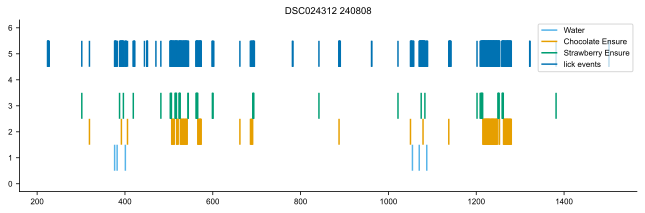

In [6]:
P1_time, P1C_time, P1D_time, Pump_all = Pump_event_calculate_P1_all(phenosys_file)

L1_timestamps_new, L2_timestamps_new, all_lick_events = lick_event_calculate(phenosys_file)

plt.figure(figsize=[9,3])
plt.title(f"{mouse_id} {date}")
plt.eventplot(P1_time,color=my_color_map[0],label=flavor_dict['P1'])
plt.eventplot(P1C_time,lineoffsets=2,color=my_color_map[1],label=flavor_dict['P1C'])
plt.eventplot(P1D_time,lineoffsets=3,color=my_color_map[2],label=flavor_dict['P1D'])
# plt.eventplot(Pump_all,lineoffsets=4,color=my_color_map[3],label='all_pump_events')

plt.eventplot(L1_timestamps_new,lineoffsets=5,color=my_color_map[4],label='lick events')

plt.legend()
sns.despine()
plt.tight_layout()
# plt.xlim([30,300])

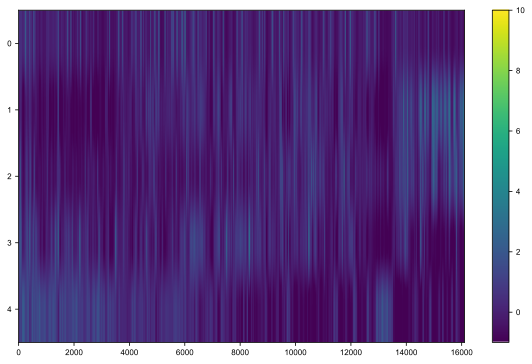

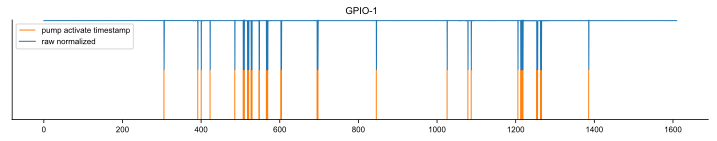

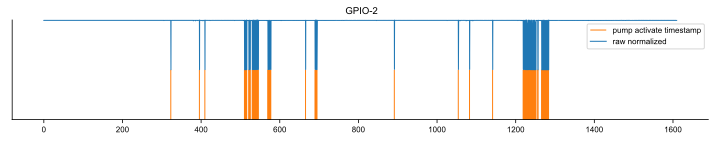

time difference: 3.780000000000001
time_difference = -3.780000000000001


In [8]:
## load Ca2+ csv
df_all = pd.read_csv(ca2_csv_file,header=[0,1],index_col=0)
# Selecet only the accepted cells
df_accepted = df_all.xs(' accepted',level='Time(s)/Cell Status',axis=1)
df_accepted
from scipy import stats
df_z = df_accepted.apply(stats.zscore,axis=0)

vmax,vmin=10,-1

plt.figure(figsize=[10,6])
plt.imshow(df_z.T,aspect='auto',vmax=vmax,vmin=vmin)
plt.colorbar()

## extract GPIO time stamps to match with Phenosys P1D and P1C 

df_GPIO = df_GPIO = pd.read_csv(GPIO_csv_file, header=[0], index_col=0)

def extract_GPIO_trace(df_GPIO,plot=False):
    """
    Extract GPIO traces and binarized them to timestamps
    """
    GPIO_channel_list = [name for name in df_GPIO[' Channel Name'].unique() if 'IO' in name]
    ## this should extract both GPIO or IO prefix in difference nVista system
    gpio_pump_time_all = {}
    for channel in GPIO_channel_list:
        gpio_value = df_GPIO.loc[df_GPIO[' Channel Name'] == channel][' Value'].astype(float)
        # print(channel)
        ## check if there is signal at all
        if gpio_value.max()/(gpio_value.min()+1e-8) > 2: # prevent min is 0
            gpio_norm = (gpio_value-gpio_value.min())/(gpio_value.max()-gpio_value.min())
            gpio_timestamps = np.concatenate([np.zeros(1),gpio_norm[gpio_norm<0.5].index],axis=0)
            gpio_time_diff = np.diff(gpio_timestamps)
            gpio_pump_time = gpio_timestamps[1:][gpio_time_diff>0.04]
            gpio_pump_time_all[channel] = gpio_pump_time
            # print(f'First pump time: {gpio_pump_time_all[channel][0]}')

            if plot:
                plt.figure(figsize=[10,2])
                plt.title(channel)
                plt.eventplot(gpio_pump_time_all[channel],colors='C1',lineoffsets=-0.5,linewidths=1,label='pump activate timestamp')
                plt.plot(gpio_norm,lw=1,label='raw normalized')
                plt.legend()
                plt.yticks([])
                plt.ylim([-1,1])
                sns.despine()
                plt.tight_layout()
                # plt.xlim([300,350])
                # plt.xlim([410,420])
                plt.show()
        else:
            # print(f'No inputs in{channel} channel, skipped\n')
            # print(channel)
            pass
    ## Check if GPIO signals are missing, if so add an empty np array to the corresponding channel:
    # print(f'chan #{len(gpio_pump_time_all.keys())}')
    if len(gpio_pump_time_all.keys())==1:
        if ' GPIO-1' in gpio_pump_time_all.keys():
            gpio_pump_time_all[' GPIO-2'] = np.array([])
        elif ' IO1' in gpio_pump_time_all.keys():
            gpio_pump_time_all[' IO2'] = np.array([])
        elif ' IO2' in gpio_pump_time_all.keys():
            gpio_pump_time_all[' IO1'] = np.array([])
        elif ' GPIO-3' in gpio_pump_time_all.keys():
            gpio_pump_time_all[' GPIO-4'] = np.array([])
    ## simplify GPIO channel to just GPIO1 & 2
    keys = gpio_pump_time_all.keys()
    # print(f'chan #{len(gpio_pump_time_all.keys())}')
    # GPIO_pool = []
    for idx,key in enumerate(keys):
      # print(idx,key)
      # print(gpio_pump_time_all.get(key))
    #   GPIO_pool.append(np.min(gpio_pump_time_all[key]))
      if idx ==0:
        GPIO_pump1 = gpio_pump_time_all[key]
      else:
        GPIO_pump2 = gpio_pump_time_all[key]
    GPIO_pump1_clean, GPIO_pump2_clean, GPIO_pump_all_no_init = remove_isx_GPIO_init(GPIO_pump1,GPIO_pump2)
    # GPIO_min = np.min(GPIO_pump_all_no_init)
    # print(len(GPIO_pump1_clean), len(GPIO_pump2_clean))

    return GPIO_pump1_clean, GPIO_pump2_clean, GPIO_pump_all_no_init

def remove_isx_GPIO_init(Pump1,Pump2):
  pump_all = [*Pump1,*Pump2]
  pump_all = sorted(pump_all)
  ## remove all pump event in 300 sec, since there shouldn't be any
  pump_all = [i for i in pump_all if i >= 300]
  pump_all = np.array(pump_all)
  x_shift_end = pump_all[-1]
  x_shift_start = pump_all[0] -120 # force the x_bar to start at the beginning of this round
  x_bar = [x*180+300 for x in range(18)]
  # x_bar = [0] + x_bar
  x_bar = np.array(x_bar)
  x_bar = x_bar[x_bar<x_shift_end]
  x_bar = x_bar[x_bar>x_shift_start]
  Pump1 = np.array(Pump1)
  Pump2 = np.array(Pump2)
  for x in x_bar:
    if find_nearest(pump_all[pump_all>x],x)-x>25: # this means there is no initial pulse within 3 sec at the round starting time
       pass
    else:
      if len(Pump2[Pump2>x]) == 0: ## prevent the 2nd pump is empty
        if len(Pump1[Pump1>x]) == 0:
          #  print('no event in this range, skip')
          pass
        else:
          nearest_num = [find_nearest(Pump1[Pump1>x],x)]
          if find_nearest(nearest_num,x) in Pump1:
            Pump1 = np.delete(Pump1, np.where(Pump1 == find_nearest(nearest_num,x)))
            # print(f'{x}, del {find_nearest(nearest_num,x)} from Pump1 isx')
      else:
        if len(Pump1[Pump1>x]) == 0:
          nearest_num = [find_nearest(Pump2[Pump2>x],x)]
          Pump2 = np.delete(Pump2, np.where(Pump2 == find_nearest(nearest_num,x)))
          # print(f'{x}, del {find_nearest(nearest_num,x)} from Pump2 isx')
        else:
          nearest_num = [find_nearest(Pump1[Pump1>x],x),find_nearest(Pump2[Pump2>x],x)]
          if find_nearest(nearest_num,x) in Pump1:
            Pump1 = np.delete(Pump1, np.where(Pump1 == find_nearest(nearest_num,x)))
            # print(f'{x}, del {find_nearest(nearest_num,x)} from Pump1 isx')
          elif find_nearest(nearest_num,x) in Pump2:    
            Pump2 = np.delete(Pump2, np.where(Pump2 == find_nearest(nearest_num,x)))
            # print(f'{x}, del {find_nearest(nearest_num,x)} from Pump2 isx')
  Pump_all_no_init = [*Pump1,*Pump2]
  Pump_all_no_init = np.array(sorted(Pump_all_no_init))
  return Pump1,Pump2,Pump_all_no_init

## find nearst value in np array
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

GPIO_pump1_clean, GPIO_pump2_clean, GPIO_pump_all_no_init = extract_GPIO_trace(df_GPIO,plot=True)

## align data frames

## align with all GPIO and P1D and P1C phenosys
P1D_P1C_time = np.concatenate([P1C_time,P1D_time],axis=0)
P1D_P1C_time = np.array(sorted(P1D_P1C_time))

GPIO_pump_all_no_init

def get_time_difference(PAll,GPIO_pump_all_no_init,windowsize=100):
    """
    This is the current one I used now, use the pynapple cross-correlogram funciton, I can get the time difference without fully matching the timestamps
    """
    if len(PAll) <2:
      print('no enough drinking events')
      time_difference = 0
    else:
      ts1 = nap.Ts(np.array(PAll))
      ts2 = nap.Ts(np.array(GPIO_pump_all_no_init))
      ts1_time_array = ts1.index.values
      ts2_time_array = ts2.index.values

      # if date =='21.09.10':
      #    windowsize = 5

      binsize=0.001
      tsgroup = nap.TsGroup({0:ts1,1:ts2})
      cross_corr = nap.compute_crosscorrelogram(tsgroup,binsize=binsize,windowsize=windowsize)
      lag = cross_corr.idxmax().values # the index of max value
      # cc12, xt = nap.cross_correlogram(t1=ts1_time_array,t2=ts2_time_array,binsize=binsize,windowsize=windowsize)

      # idx_max = np.argmax(cc12)
      # print(f'time difference: {-xt[idx_max]}')
      print(f'time difference: {lag[0]}')
      time_difference = -lag[0] # set to negative
      # plt.figure()
      # plt.bar(xt, cc12, binsize)
      # plt.xlabel("Time t1 (s)")
      # plt.ylabel("CC")
    return time_difference 

time_difference = get_time_difference(P1D_P1C_time,GPIO_pump_all_no_init)

print(f'{time_difference = }')

df_z.index = df_z.index+time_difference



In [38]:
# ts1 = nap.Ts(
#         t=np.sort(np.random.uniform(0, 100, 1000)), time_units="s")
# ts2 = nap.Ts(
#         t=ts1.index+1, time_units="s")

# tsgroup = nap.TsGroup({0:ts1,1:ts2})
# cross_corr = nap.compute_crosscorrelogram(tsgroup,binsize=0.001,windowsize=20)
# # cross_corr = nap.compute_crosscorrelogram(nap.TsGroup({0:nap.Ts(np.sort(np.random.uniform(0, 100, 1000))),
#                                                 #        1:nap.Ts(np.sort(np.random.uniform(0, 100, 1000)))}),binsize=0.001,windowsize=20)
# cross_corr
# # np.argmax(cross_corr)
# plt.plot(cross_corr)
# print(cross_corr.idxmax()) # print time lag
# # plt.xlim([0,2])


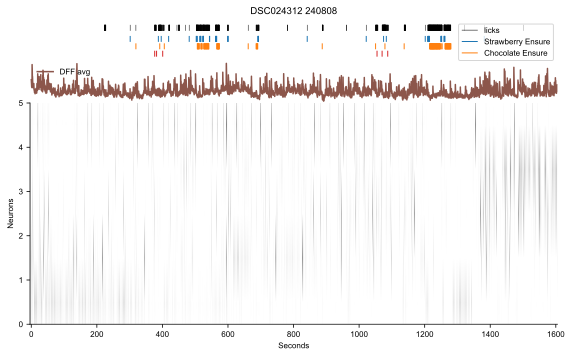

In [9]:
## plot without sorting

fig, axes = plt.subplots(figsize=[8,5],gridspec_kw={'height_ratios':[1.5,1.5,8],'hspace':0.0},nrows=3,sharex=True)

vmax=8 # cap the upper limit for color map
vmin=0.5
extent = [df_z.index[0],df_z.index[-1],0,df_z.shape[1]] # make the axis label readable
# axes[2].imshow(df_z[df_z.columns[isort]].T,aspect='auto',extent=extent,vmax=vmax,vmin=vmin,cmap='Greys',interpolation='none')
axes[2].imshow(df_z.T,aspect='auto',extent=extent,vmax=vmax,vmin=vmin,cmap='Greys',interpolation='none')

# axes[2].colorbar()
# plt.xlabel('seconds')
# plt.ylabel('cell index')

## plot pump events with with shift in y position
ymax = df_z.shape[1]
axes[0].eventplot(L1_timestamps_new,color=['k'],lineoffsets=4.5,linelengths=0.8,linewidths=0.5)
axes[0].eventplot([P1D_time,P1C_time,P1_time],lineoffsets=[3,2,1],color=['C0','C1','C3'],linelengths=0.8,linewidths=1)

axes[1].plot(df_z.mean(axis=1)[0:],color='C5',label='DFF avg',lw=1.5)
# axes[0].legend(['licks',flavor_dict['P1D'],flavor_dict['P1C'],flavor_dict['P1']],frameon=False,fontsize=6,loc=2)
axes[0].legend(['licks',flavor_dict['P1D'],flavor_dict['P1C']],frameon=True,fontsize=8)
axes[1].legend(frameon=False,loc=2)

axes[0].axis('off')
axes[1].axis('off')
axes[2].set_xlabel('Seconds')
axes[2].set_ylabel('Neurons')
axes[0].set_title(f"{mouse_id} {date}")
sns.despine(ax=axes[2])
# plt.xlim([630,980])
plt.tight_layout()


In [10]:
## test intervalset new functions


interval = 4
binge_epoch, not_binge_epoch = [],[]

binge_df, binge_epoch = detect_binge_bout(Pump_event=P1D_P1C_time,
                            n_pumps = 3, # min of pump events in one binge bout  
                            max_isi = interval,
                            min_ibi = interval)

binge_epoch.as_dataframe()

start          end
0   503.200002   544.168999
1   562.146998   573.408003
2   599.188000   600.376000
3   685.828002   693.080003
4  1208.927004  1252.910004
5  1259.236999  1279.787999

0 this bout starts with P1D
1 this bout starts with P1D
2 this bout starts with P1D
3 this bout starts with P1C
4 this bout starts with P1D
5 this bout starts with P1D


            start     end
       0  685.828  693.08
shape: (1, 2), time unit: sec.

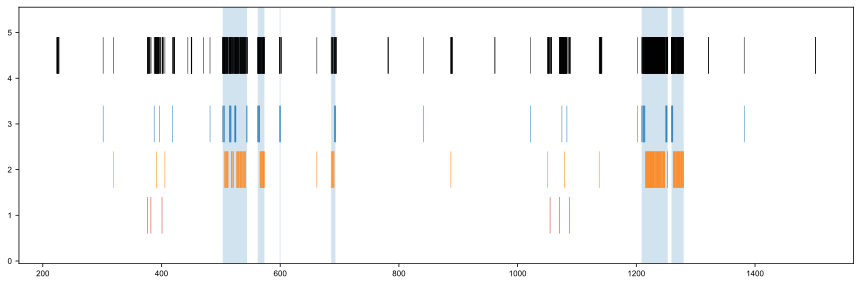

In [11]:
## run binge detection on P1D+P1C together, which will give us the overall feeding rate

interval = 4
binge_epoch, not_binge_epoch = [],[]

binge_df, binge_epoch = detect_binge_bout(Pump_event=P1D_P1C_time,
                            n_pumps = 3, # min of pump events in one binge bout  
                            max_isi = interval,
                            min_ibi = interval)
# binge_epoch

## function for converting intervalset to pandas dataframe
def intervalset2pd(intervalset):
    return pd.DataFrame(data=intervalset.values,columns=intervalset.columns)
def pd2intervalset(pd):
    return nap.IntervalSet(start=pd['start'].values,end=pd['end'].values)

# binge_epoch = intervalset2pd(binge_epoch)
# binge_epoch = pd.DataFrame(binge_epoch)
binge_epoch = binge_epoch.as_dataframe()

plt.figure(figsize=[12,4])
plt.eventplot(L1_timestamps_new,color=['k'],lineoffsets=4.5,linelengths=0.8,linewidths=0.5)
plt.eventplot([P1D_time,P1C_time,P1_time],lineoffsets=[3,2,1],color=['C0','C1','C3'],linelengths=0.8,linewidths=0.5)

for i in range(len(binge_epoch)):
    plt.axvspan(xmin=binge_epoch.start[i],xmax=binge_epoch.end[i],alpha=0.2)

plt.tight_layout()

## now find which flavor it starts with

flavor_list = []

for i in range(len(binge_epoch)):
    if binge_epoch.start[i] in P1D_time:
        print(i, 'this bout starts with P1D')
        flavor_list.append('Ensure')
    elif binge_epoch.start[i] in P1C_time:
        print(i, 'this bout starts with P1C')
        flavor_list.append('Diluted Ensure')
    else:
        print(i, 'wrong, check if something is off')

binge_epoch['flavor'] = flavor_list

binge_epoch_P1D = binge_epoch[binge_epoch['flavor'] == 'Ensure']
binge_epoch_P1D = nap.IntervalSet(binge_epoch_P1D[['start','end']])
binge_epoch_P1D

binge_epoch_P1C = binge_epoch[binge_epoch['flavor'] == 'Diluted Ensure']
binge_epoch_P1C = nap.IntervalSet(binge_epoch_P1C[['start','end']])
binge_epoch_P1C


(0.0, 3.0)

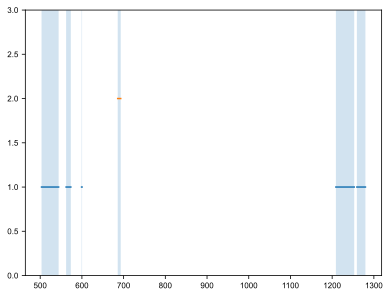

In [12]:
## measure the feeding bout length after switching
## feeding bout length after switching vs neuronal activity


binge_epoch_P1D

for i in range(len(binge_epoch)):
    plt.axvspan(xmin=binge_epoch.start[i],xmax=binge_epoch.end[i],alpha=0.2)
for i in range(len(binge_epoch_P1D)):
    plt.plot([binge_epoch_P1D.start[i],binge_epoch_P1D.end[i]],[1,1], c='C0')
for i in range(len(binge_epoch_P1C)):
    plt.plot([binge_epoch_P1C.start[i],binge_epoch_P1C.end[i]],[2,2], c='C1')
plt.ylim([0,3])
    


[691.160999]


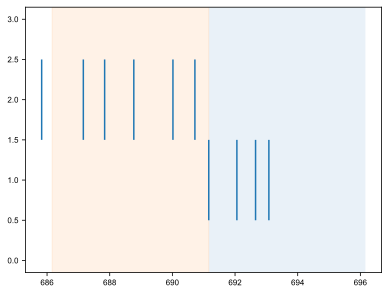

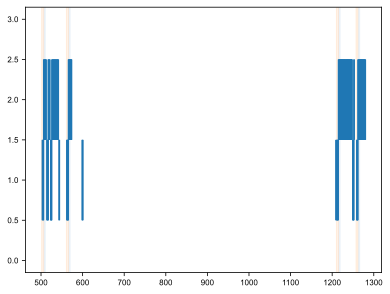

In [13]:
## find switches

## find P1C -> P1D switches

plt.eventplot(nap.Ts(P1D_time).restrict(binge_epoch_P1C).index)
plt.eventplot(nap.Ts(P1C_time).restrict(binge_epoch_P1C).index,lineoffsets=2)

P1C_P1D_switch_time = []

for i in range(len(binge_epoch_P1C)):
    # print(binge_epoch_P1C.loc[i,'start'])
    if len(nap.Ts(P1D_time).restrict(binge_epoch_P1C[i]))!=0:
        if True:
        # if nap.Ts(P1D_time).restrict(binge_epoch_P1C.iloc[i:i+1,:]).index[-1] - nap.Ts(P1D_time).restrict(binge_epoch_P1C.iloc[i:i+1,:]).index[0] >4:
            P1C_P1D_switch_time.append(nap.Ts(P1D_time).restrict(binge_epoch_P1C[i]).index[0])
print(P1C_P1D_switch_time)
for i in range(len(P1C_P1D_switch_time)):
    plt.axvspan(P1C_P1D_switch_time[i],P1C_P1D_switch_time[i]+5,alpha=0.1)
    plt.axvspan(P1C_P1D_switch_time[i]-5,P1C_P1D_switch_time[i],alpha=0.1,color='C1')

plt.show()

P1D_P1C_switch_time = []

plt.eventplot(nap.Ts(P1D_time).restrict(binge_epoch_P1D).index)
plt.eventplot(nap.Ts(P1C_time).restrict(binge_epoch_P1D).index,lineoffsets=2)

for i in range(len(binge_epoch_P1D)):
    # print(binge_epoch_P1C.loc[i,'start'])
    if len(nap.Ts(P1C_time).restrict(binge_epoch_P1D[i]))!=0:
        P1D_P1C_switch_time.append(nap.Ts(P1C_time).restrict(binge_epoch_P1D[i]).index[0])

# P1C_P1D_switch_time
for i in range(len(P1D_P1C_switch_time)):
    plt.axvspan(P1D_P1C_switch_time[i],P1D_P1C_switch_time[i]+5,alpha=0.1)
    plt.axvspan(P1D_P1C_switch_time[i]-5,P1D_P1C_switch_time[i],alpha=0.1,color='C1')




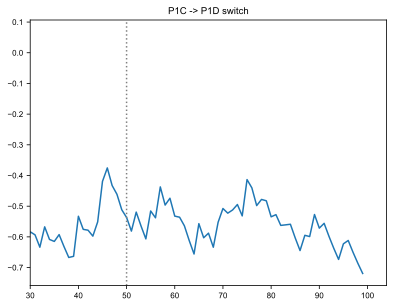

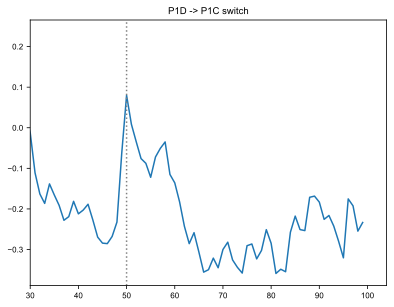

In [14]:
P1C_P1D_switch_PETH = get_PETH_dict(df_z, P1C_P1D_switch_time)

plt.title('P1C -> P1D switch')
plt.plot(dict2np(P1C_P1D_switch_PETH).mean(axis=(0,1)))
# plt.plot(dict2np(baseline_correct(P1C_P1D_switch_PETH)).mean(axis=(0,1)))
plt.xlim(xmin=30)
plt.axvline(x=50,ls=':',color='grey')
plt.show()


P1D_P1C_switch_PETH = get_PETH_dict(df_z, P1D_P1C_switch_time)

plt.title('P1D -> P1C switch')
plt.plot(dict2np(P1D_P1C_switch_PETH).mean(axis=(0,1)))
# plt.plot(dict2np(baseline_correct(P1D_P1C_switch_PETH)).mean(axis=(0,1)))
plt.xlim(xmin=30)
plt.axvline(x=50,ls=':',color='grey')
plt.show()



In [16]:
# isort_switch = np.argsort(-dict2np(P1C_P1D_switch_PETH)[:,:,50:70].mean(axis=(1,2)))

# plt.imshow(dict2np(P1C_P1D_switch_PETH).mean(axis=(1))[isort_switch],aspect='auto')
# plt.ylabel('neurons')
# plt.show()

# isort_switch = np.argsort(-dict2np(P1C_P1D_switch_PETH)[:,:,50:70].mean(axis=(0,2)))
# plt.imshow(dict2np(P1C_P1D_switch_PETH).mean(axis=(0))[isort_switch],aspect='auto')
# plt.ylabel('switches')
# plt.show()

# isort_switch = np.argsort(-dict2np(P1D_P1C_switch_PETH)[:,:,50:70].mean(axis=(0,2)))
# plt.imshow(dict2np(P1D_P1C_switch_PETH).mean(axis=(0))[isort_switch],aspect='auto')
# plt.ylabel('switches')
# plt.show()



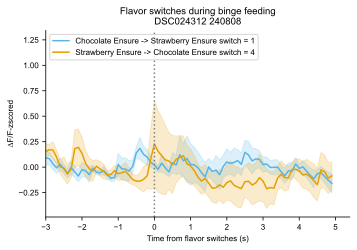

In [15]:
##

plt.figure(figsize=[5,3.5])
plt.title(f'Flavor switches during binge feeding\n{mouse_id} {date}')
sns.lineplot(np2df_long(dict2np(baseline_correct(P1C_P1D_switch_PETH,window=3)).mean(axis=(1))),x='Time (sec)',y='zs-dff',errorbar=('se'),
             label=f'{flavor_dict["P1C"]} -> {flavor_dict["P1D"]} switch = {dict2np(P1C_P1D_switch_PETH).shape[1]}',color=my_color_map[0])
sns.lineplot(np2df_long(dict2np(baseline_correct(P1D_P1C_switch_PETH,window=3)).mean(axis=(1))),x='Time (sec)',y='zs-dff',errorbar=('se'),
             label=f'{flavor_dict["P1D"]} -> {flavor_dict["P1C"]} switch = {dict2np(P1D_P1C_switch_PETH).shape[1]}',color=my_color_map[1])

# sns.lineplot(np2df_long(dict2np(P1C_P1D_switch_PETH).mean(axis=(1))),x='Time (sec)',y='zs-dff',errorbar=('se'),
#              label=f'{flavor_dict["P1C"]} -> {flavor_dict["P1D"]} switch = {dict2np(P1C_P1D_switch_PETH).shape[1]}',color=my_color_map[0])
# sns.lineplot(np2df_long(dict2np(P1D_P1C_switch_PETH).mean(axis=(1))),x='Time (sec)',y='zs-dff',errorbar=('se'),
#              label=f'{flavor_dict["P1D"]} -> {flavor_dict["P1C"]} switch = {dict2np(P1D_P1C_switch_PETH).shape[1]}',color=my_color_map[1])
plt.xlim(xmin=-3)
plt.xlabel('Time from flavor switches (s)')
plt.ylabel('∆F/F-zscored')
plt.legend(loc=2)
# plt.ylim(ymax=0.065)
plt.axvline(x=0,ls=':',color='grey')
sns.despine()
plt.tight_layout()

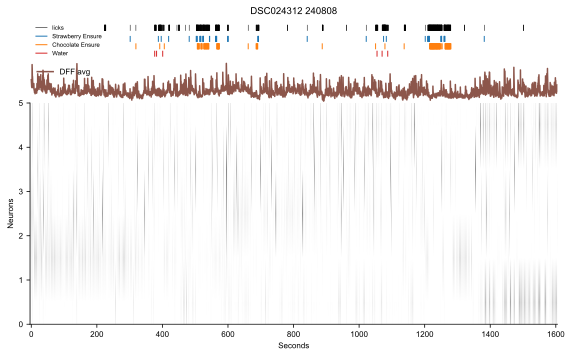

In [16]:
## plot without sorting

## sort with switches
isort = np.argsort(-(df_z[P1C_P1D_switch_time[0]:P1C_P1D_switch_time[0]+2].mean(axis=(0))-df_z[P1C_P1D_switch_time[0]-1:P1C_P1D_switch_time[0]].mean(axis=(0))))

fig, axes = plt.subplots(figsize=[8,5],gridspec_kw={'height_ratios':[1.5,1.5,8],'hspace':0.0},nrows=3,sharex=True)

vmax=8 # cap the upper limit for color map
vmin=0.5
extent = [df_z.index[0],df_z.index[-1],0,df_z.shape[1]] # make the axis label readable
axes[2].imshow(df_z[df_z.columns[isort]].T,aspect='auto',extent=extent,vmax=vmax,vmin=vmin,cmap='Greys',interpolation='none')
# axes[2].imshow(df_z.T,aspect='auto',extent=extent,vmax=vmax,vmin=vmin,cmap='Greys',interpolation='none')

## plot pump events with with shift in y position
ymax = df_z.shape[1]
axes[0].eventplot(L1_timestamps_new,color=['k'],lineoffsets=4.5,linelengths=0.8,linewidths=0.5)
axes[0].eventplot([P1D_time,P1C_time,P1_time],lineoffsets=[3,2,1],color=['C0','C1','C3'],linelengths=0.8,linewidths=1)

axes[1].plot(df_z.mean(axis=1)[0:],color='C5',label='DFF avg',lw=1.5)
axes[0].legend(['licks',flavor_dict['P1D'],flavor_dict['P1C'],flavor_dict['P1']],frameon=False,fontsize=6,loc=2)
# axes[0].legend(['licks',flavor_dict['P1D'],flavor_dict['P1C']],frameon=True,fontsize=8,loc=[0.5,0.05])
axes[1].legend(frameon=False,loc=2)

# for i in range(len(binge_epoch_P1C)):
#     axes[0].axvspan(xmin=nap.Ts(P1C_time).restrict(binge_epoch_P1C[i:i+1]).index[1],xmax=binge_epoch_P1C.loc[i,'end'],alpha=0.1)
#     axes[1].axvspan(xmin=binge_epoch_P1C.loc[i,'start'],xmax=binge_epoch_P1C.loc[i,'end'],alpha=0.1)
#     axes[2].axvspan(xmin=binge_epoch_P1C.loc[i,'start'],xmax=binge_epoch_P1C.loc[i,'end'],alpha=0.1)

axes[0].axis('off')
axes[1].axis('off')
axes[2].set_xlabel('Seconds')
axes[2].set_ylabel('Neurons')
axes[0].set_title(f"{mouse_id} {date}")
sns.despine(ax=axes[2])
# plt.xlim([630,980])
# plt.xlim([630,750])

plt.tight_layout()


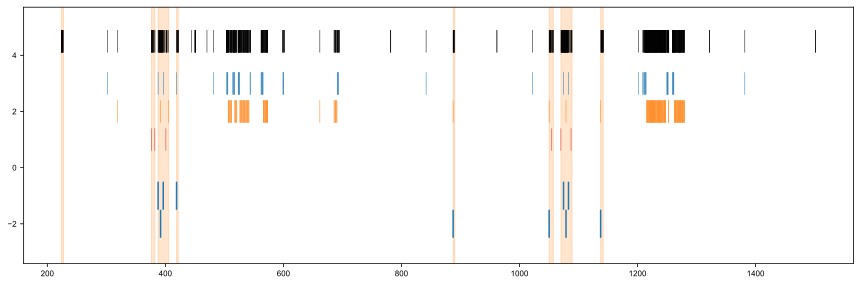

In [17]:
## take out binge bouts from pump events so we have only sloww feeding events left.

interval = 4
lick_df, lick_epoch = detect_binge_bout(Pump_event=L1_timestamps_new,
                                        n_pumps = 3, # min of pump events in one binge bout  
                                        max_isi = interval,
                                        min_ibi = interval)
binge_epoch
lick_epoch = lick_epoch.set_diff(pd2intervalset(binge_epoch))
## remove epoch smaller than 2 seconds?
lick_epoch = intervalset2pd(lick_epoch)
lick_epoch['duration'] = lick_epoch['end']- lick_epoch['start']
lick_epoch = lick_epoch[lick_epoch['duration']>2]
lick_epoch = pd2intervalset(lick_epoch)
lick_epoch

plt.figure(figsize=[12,4])
plt.eventplot(L1_timestamps_new,color=['k'],lineoffsets=4.5,linelengths=0.8,linewidths=0.5)
plt.eventplot([P1D_time,P1C_time,P1_time],lineoffsets=[3,2,1],color=['C0','C1','C3'],linelengths=0.8,linewidths=0.5)

for i in range(len(lick_epoch)):
    plt.axvspan(xmin=lick_epoch.start[i],xmax=lick_epoch.end[i],alpha=0.2,color='C1')

plt.eventplot(nap.Ts(P1D_time).restrict(lick_epoch).index,lineoffsets=-1) # this is ensure slow timestamps
plt.eventplot(nap.Ts(P1C_time).restrict(lick_epoch).index,lineoffsets=-2) # this is diluted ensure slow timestamps

plt.tight_layout()
# plt.xlim([650,750])

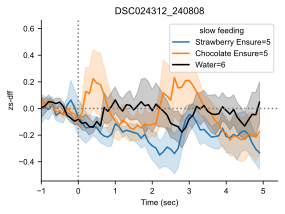

In [81]:

## get pump events only during slow feeding/licking epoch

P1D_slow_ts = nap.Ts(P1D_time).restrict(lick_epoch).index
P1C_slow_ts = nap.Ts(P1C_time).restrict(lick_epoch).index
P1_slow_ts  = nap.Ts(P1_time).restrict(lick_epoch).index

# remove trials where there is no lick events after pump delivery
P1D_slow_ts_clean  = slow_feeding_event_clean_up(slow_milk_ts=P1D_slow_ts, lick_event=L1_timestamps_new)
P1C_slow_ts_clean  = slow_feeding_event_clean_up(slow_milk_ts=P1C_slow_ts, lick_event=L1_timestamps_new)
P1_slow_ts_clean   = slow_feeding_event_clean_up(slow_milk_ts=P1_slow_ts, lick_event=L1_timestamps_new)

P1D_PETH = dict2np(baseline_correct(get_PETH_dict(df_accepted=df_z,slow_milk_ts_clean=P1D_slow_ts_clean)))
P1C_PETH = dict2np(baseline_correct(get_PETH_dict(df_accepted=df_z,slow_milk_ts_clean=P1C_slow_ts_clean)))
P1_PETH  = dict2np(baseline_correct(get_PETH_dict(df_accepted=df_z,slow_milk_ts_clean=P1_slow_ts_clean)))

plt.figure(figsize=[4,3])
plt.title(f'{mouse_id}_{date}')
sns.lineplot(np2df_long(P1D_PETH.mean(axis=1)),x='Time (sec)',y='zs-dff',errorbar='se', label=f'{flavor_dict["P1D"]}={P1D_PETH.shape[1]}')
sns.lineplot(np2df_long(P1C_PETH.mean(axis=1)),x='Time (sec)',y='zs-dff',errorbar='se', label=f'{flavor_dict["P1C"]}={P1C_PETH.shape[1]}')
sns.lineplot(np2df_long(P1_PETH.mean(axis=1)),x='Time (sec)',y='zs-dff',errorbar='se', label=f'{flavor_dict["P1"]}={P1_PETH.shape[1]}',color='k')

sns.despine()
plt.legend(title='slow feeding')
plt.axvline(x=0,color='grey',ls=':')
plt.axhline(y=0,color='grey',ls=':')
plt.xlim(xmin=-1)
plt.tight_layout()

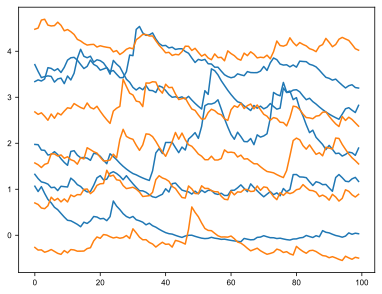

In [87]:
for i in range(5):
    plt.plot(P1C_PETH.mean(axis=1)[i]+i,c='C0')
    plt.plot(P1D_PETH.mean(axis=1)[i]+i,c='C1')
# plt.xlim(xmin=40)

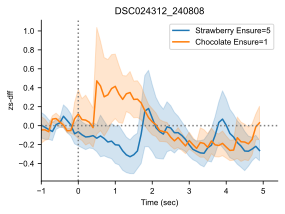

In [19]:
## binge_ensure time
ensure_binge_onset_time_list = binge_epoch_P1D.start

binge_onset_ensure = dict2np(baseline_correct(get_PETH_dict(df_accepted=df_z, slow_milk_ts_clean=np.array(ensure_binge_onset_time_list))))

diluted_ensure_binge_onset_time_list = binge_epoch_P1C.start

binge_onset_ensure_diluted = dict2np(baseline_correct(get_PETH_dict(df_accepted=df_z, slow_milk_ts_clean=np.array(diluted_ensure_binge_onset_time_list))))

# y_max = np.max(np.array([binge_onset_ensure.mean(axis=(0,1))[40:].max(),binge_onset_ensure_diluted.mean(axis=(0,1))[40:].max()]))

plt.figure(figsize=[4,3])
plt.title(f'{mouse_id}_{date}')
if binge_onset_ensure.shape[1] !=0:
    sns.lineplot(np2df_long(binge_onset_ensure.mean(axis=1)),x='Time (sec)',y='zs-dff',errorbar='se', label=f'{flavor_dict["P1D"]}={binge_onset_ensure.shape[1]}')
if binge_onset_ensure_diluted.shape[1] !=0:
    sns.lineplot(np2df_long(binge_onset_ensure_diluted.mean(axis=1)),x='Time (sec)',y='zs-dff',errorbar='se', label=f'{flavor_dict["P1C"]}={binge_onset_ensure_diluted.shape[1]}')
sns.despine()
plt.legend()
plt.axvline(x=0,color='grey',ls=':')
plt.axhline(y=0,color='grey',ls=':')
plt.xlim(xmin=-1)
# plt.ylim(ymax=y_max+0.1)
plt.tight_layout()


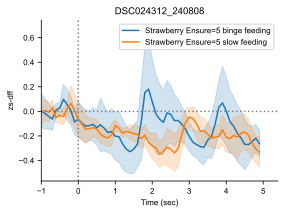

In [32]:

plt.figure(figsize=[4,3])
plt.title(f'{mouse_id}_{date}')
if binge_onset_ensure.shape[1] !=0:
    sns.lineplot(np2df_long(binge_onset_ensure.mean(axis=1)),x='Time (sec)',y='zs-dff',errorbar='se', label=f'{flavor_dict["P1D"]}={binge_onset_ensure.shape[1]} binge feeding')
# if binge_onset_ensure_diluted.shape[1] !=0:
    # sns.lineplot(np2df_long(binge_onset_ensure_diluted.mean(axis=1)),x='Time (sec)',y='zs-dff',errorbar='se', label=f'{flavor_dict["P1C"]}={binge_onset_ensure_diluted.shape[1]}')
sns.lineplot(np2df_long(P1D_PETH.mean(axis=1)),x='Time (sec)',y='zs-dff',errorbar='se', label=f'{flavor_dict["P1D"]}={P1D_PETH.shape[1]} slow feeding')

sns.despine()
plt.legend()
plt.axvline(x=0,color='grey',ls=':')
plt.axhline(y=0,color='grey',ls=':')
plt.xlim(xmin=-1)
# plt.ylim(ymax=y_max+0.1)
plt.tight_layout()

In [61]:
np.concatenate([binge_onset_ensure_diluted,binge_onset_ensure],axis=1).shape

(5, 6, 100)

(40.0, 103.95)

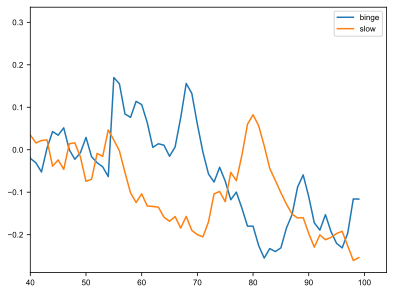

In [58]:
plt.plot(np.concatenate([binge_onset_ensure_diluted.mean(axis=1),binge_onset_ensure.mean(axis=1)],axis=0).mean(axis=0),label='binge')
plt.plot(np.concatenate([P1D_PETH.mean(axis=1),P1C_PETH.mean(axis=1)],axis=0).mean(axis=0),label='slow')
plt.legend()
plt.xlim(xmin=40)

(40.0, 103.95)

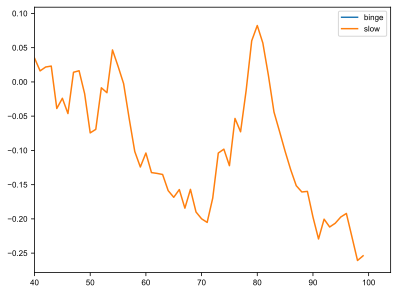

In [59]:
neuron_i = 0

plt.plot(np.concatenate([binge_onset_ensure_diluted[neuron_i].mean(axis=0),binge_onset_ensure[neuron_i].mean(axis=0)],axis=0).mean(axis=0),label='binge')
plt.plot(np.concatenate([P1D_PETH.mean(axis=1),P1C_PETH.mean(axis=1)],axis=0).mean(axis=0),label='slow')
plt.legend()
plt.xlim(xmin=40)

In [45]:
binge_onset_ensure.shape

(5, 5, 100)

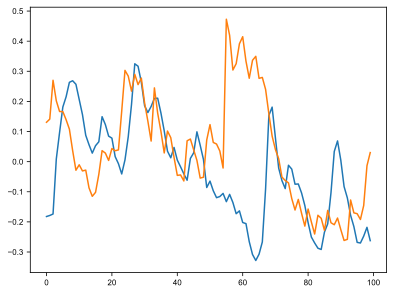

In [40]:
# plt.imshow(binge_onset_ensure.mean(axis=1),aspect='auto')
plt.plot(binge_onset_ensure.mean(axis=(0,1)))
plt.plot(binge_onset_ensure_diluted.mean(axis=(0,1)))
# np.concatenate([binge_onset_ensure_diluted,binge_onset_ensure])

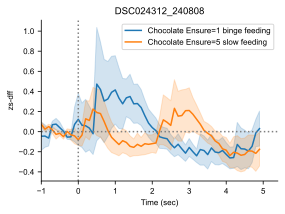

In [62]:

plt.figure(figsize=[4,3])
plt.title(f'{mouse_id}_{date}')
# if binge_onset_ensure.shape[1] !=0:
    # sns.lineplot(np2df_long(binge_onset_ensure.mean(axis=1)),x='Time (sec)',y='zs-dff',errorbar='se', label=f'{flavor_dict["P1D"]}={binge_onset_ensure.shape[1]} binge feeding')
if binge_onset_ensure_diluted.shape[1] !=0:
    sns.lineplot(np2df_long(binge_onset_ensure_diluted.mean(axis=1)),x='Time (sec)',y='zs-dff',errorbar='se', label=f'{flavor_dict["P1C"]}={binge_onset_ensure_diluted.shape[1]} binge feeding')
sns.lineplot(np2df_long(P1C_PETH.mean(axis=1)),x='Time (sec)',y='zs-dff',errorbar='se', label=f'{flavor_dict["P1C"]}={P1C_PETH.shape[1]} slow feeding')


sns.despine()
plt.legend()
plt.axvline(x=0,color='grey',ls=':')
plt.axhline(y=0,color='grey',ls=':')
plt.xlim(xmin=-1)
# plt.ylim(ymax=y_max+0.1)
plt.tight_layout()

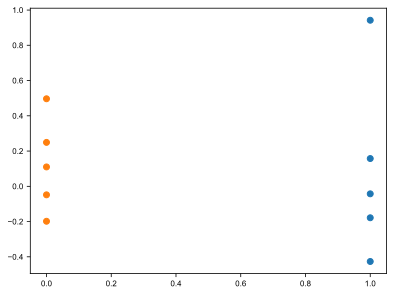

In [80]:
# plt.plot([binge_onset_ensure[:,:,50:80].mean(axis=(1,2)),P1D_PETH[:,:,50:80].mean(axis=(1,2))])
plt.plot(np.ones(5), binge_onset_ensure[:,:,50:80].mean(axis=(1,2))-P1D_PETH[:,:,50:80].mean(axis=(1,2)),ls='',marker='o')
plt.plot(np.zeros(5), binge_onset_ensure_diluted[:,:,50:80].mean(axis=(1,2))-P1C_PETH[:,:,50:80].mean(axis=(1,2)),ls='',marker='o')

In [20]:
## save a dict for all these few recordings


# binge_onset_dict = {}
# diluted_binge_onset_dict = {}

# binge_onset_dict[f'{mouse_id}_{date}'] = binge_onset_ensure.mean(axis=1)
# diluted_binge_onset_dict[f'{mouse_id}_{date}'] = binge_onset_ensure_diluted.mean(axis=1)



In [21]:
## loop through these 3 sessions

# binge_onset_ensure_loop = np.empty(100)
# diluted_binge_onset_ensure_loop = np.empty(100)

# for key in binge_onset_dict.keys():
#     print(key)
#     binge_onset_ensure_loop = np.vstack([binge_onset_ensure_loop,binge_onset_dict.get(key)])
#     diluted_binge_onset_ensure_loop = np.vstack([diluted_binge_onset_ensure_loop,diluted_binge_onset_dict.get(key)])

# binge_onset_ensure_loop.shape # [1:]

# # plt.plot(binge_onset_ensure_loop.mean(axis=0))
# # plt.plot(diluted_binge_onset_ensure_loop.mean(axis=0))

# plt.figure(figsize=[4,3])
# # plt.title(f'{mouse_id}_{date}')

# sns.lineplot(np2df_long(binge_onset_ensure_loop),x='Time (sec)',y='zs-dff',errorbar='se', label=f'{flavor_dict["P1D"]}',color=my_color_map[0])
# sns.lineplot(np2df_long(diluted_binge_onset_ensure_loop),x='Time (sec)',y='zs-dff',errorbar='se', label=f'{flavor_dict["P1C"]}',color=my_color_map[1])
# sns.despine()
# plt.title('Binge feeding onset')
# plt.legend(title='6 recordings from 3 mice')
# plt.axvline(x=0,color='grey',ls=':')
# plt.axhline(y=0,color='grey',ls=':')
# plt.xlim(xmin=-1)
# plt.tight_layout()

In [22]:
## pool slow feeding together

# slow_P1D_dict, slow_P1C_dict, slow_P1_dict = {},{},{}

# slow_P1D_dict[f'{mouse_id}_{date}'] = P1D_PETH.mean(axis=1)
# slow_P1C_dict[f'{mouse_id}_{date}'] = P1C_PETH.mean(axis=1)
# slow_P1_dict[f'{mouse_id}_{date}']  = P1_PETH.mean(axis=1)




# binge_onset_dict[f'{mouse_id}_{date}'] = binge_onset_ensure.mean(axis=1)
# diluted_binge_onset_dict[f'{mouse_id}_{date}'] = binge_onset_ensure_diluted.mean(axis=1)



In [23]:


class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))



/opt/anaconda3/envs/pynapple/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


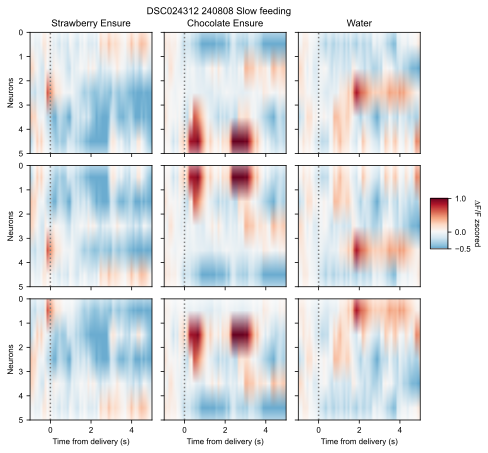

In [24]:
## heatmaps for slow feeding, 3 flavors

isort_P1D = np.argsort(-P1D_PETH[:,:,50:80].mean(axis=(1,2)))
isort_P1C = np.argsort(-P1C_PETH[:,:,50:80].mean(axis=(1,2)))
isort_P1  = np.argsort( -P1_PETH[:,:,50:80].mean(axis=(1,2)))

vmin = -0.5
vmax = 1
midpoint = 0

norm = MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=midpoint)

extent = [-1,5,P1D_PETH.shape[0],0]

fig, axes = plt.subplots(figsize=[7,7],nrows=3,ncols=3,sharex=True,sharey=True,gridspec_kw={'hspace':0.1,'wspace':0.1})

mx = axes[0,0].imshow(P1D_PETH.mean(axis=1)[isort_P1D,40:], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')
axes[0,1].imshow(P1C_PETH.mean(axis=1)[isort_P1D,40:], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')
axes[0,2].imshow(P1_PETH.mean(axis=1) [isort_P1D,40:], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')

axes[1,0].imshow(P1D_PETH.mean(axis=1)[isort_P1C,40:], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')
axes[1,1].imshow(P1C_PETH.mean(axis=1)[isort_P1C,40:], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')
axes[1,2].imshow(P1_PETH.mean(axis=1) [isort_P1C,40:], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')

axes[2,0].imshow(P1D_PETH.mean(axis=1)[isort_P1 ,40:], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')
axes[2,1].imshow(P1C_PETH.mean(axis=1)[isort_P1 ,40:], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')
axes[2,2].imshow(P1_PETH.mean(axis=1) [isort_P1 ,40:], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')

axes[0,0].set_ylabel('Neurons')
axes[1,0].set_ylabel('Neurons')
axes[2,0].set_ylabel('Neurons')

axes[2,0].set_xlabel('Time from delivery (s)')
axes[2,1].set_xlabel('Time from delivery (s)')
axes[2,2].set_xlabel('Time from delivery (s)')

for ax in axes.flatten():
    ax.axvline(x=0,ls=':',color='grey')

axes[0,0].set_title(f"{flavor_dict['P1D']}")
axes[0,1].set_title(f"{flavor_dict['P1C']}")
axes[0,2].set_title(f"{flavor_dict['P1']}")
fig.suptitle(f'{mouse_id} {date} Slow feeding',y=0.93)

## make side color bar with shrinking
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.45, 0.035, 0.1])
cbar_ax.get_yaxis().labelpad = 15
fig.colorbar(mx, cax=cbar_ax,ticks=[vmin,0,vmax])
cbar_ax.set_ylabel('∆F/F zscored', rotation=270,labelpad=10)

# plt.tight_layout()
plot_name = 'revision/3flavors_heatmap_all'
save_plot_pdf(plot_name)

In [25]:

def cal_auroc(PETH, baseline_window=1,steps=20):
  """
  PETH: 3D np array of neuronal matrix, ordered with neurons, trials, timestamps
  baseline_window: * sec before pump delivery, default is 1 sec

  """
  from sklearn.metrics import auc

  auc_total_all_cell       = np.zeros((PETH.shape[0],PETH.shape[2]))
  frate = 10 # all 10 Hz

  data = PETH
  for idx in range(data.shape[0]):
        if idx%50==0:
          print(f'now at neuron: {idx}')
        
        baseline = data[idx,:,50-baseline_window*frate:50].flatten()
        auc_total = []
        for i in range(data.shape[2]):
          stimulus = data[idx,:,i]
          pool = [*baseline, *stimulus]
          steps = steps
          criteria = [min(pool) + (j*(max(pool)-min(pool))/steps) for j in range(steps)]
          criteria[0] = criteria[0] - 1e-12 # modify the min value to slighter lesser value, so baseline/stimulus will be larger than the min of criteria
          pbase = []
          pstim = []
          # Calculate P(above threshold) for each cutoff
          for cri in criteria:
            pbase.append(sum(baseline > cri)/len(baseline))
            pstim.append(sum(stimulus > cri)/len(stimulus))
          auc_ = auc(x = pbase, y = pstim)
          auc_total.append(auc_)
        auc_total_all_cell[idx,:] = auc_total

  return auc_total_all_cell

## make a classification function here based on auROC
def checkConsecutive(l,n=3):
    n = n-1 # diff will be one less than all elements in the list
    return (sum(np.diff(sorted(l)) == 1) >= n) 

def cell_class(auroc,window=2,threshold_sd=2):
   consecutive_n = 3
   idx_positive = []
   idx_negative = []
   frate = 10
   for idx in range(auroc.shape[0]):
    threshold_high = np.mean(auroc[idx,40:50]) + np.std(auroc[idx,40:50])*threshold_sd
    auroc_temp = auroc[idx].copy()
    j_temp = []
    for j in range(50,50+int(window*frate)):  # Only look at first 2 sec after delivery (the window size)
        if auroc_temp[j] > threshold_high:
           j_temp.append(j)
    if j_temp !=[]:
        if checkConsecutive(j_temp,n=consecutive_n) == True:
           idx_positive.append(idx)
      # print('# {} is responding to milk'.format(idx))
   for idx in range(auroc.shape[0]):
    threshold_high = np.mean(auroc[idx,40:50]) - np.std(auroc[idx,40:50])*threshold_sd
    auroc_temp = auroc[idx].copy()
    j_temp = []
    for j in range(50,50+int(window*frate)):  # Only look at first 2 sec after delivery (the window size)
        if auroc_temp[j] < threshold_high:
           j_temp.append(j)
    if j_temp !=[]:
        if checkConsecutive(j_temp,n=consecutive_n) == True:
           idx_negative.append(idx)
      # print('# {} is responding to milk'.format(idx))
   ## make idx for non-responding neurons
   cellnum = auroc.shape[0]
   idx_non = []
   idx_non = [i for i in range(cellnum) if i not in idx_positive and i not in idx_negative]
   return idx_positive, idx_negative, idx_non

In [26]:
## perform auROC calculation if not yet performed

auroc_dict = {}
pumps_list = ['P1D','P1C','P1']

for pump_this_round in pumps_list:
    output_file_name = f'/Users/hunglo/Documents/inscopix_csv/2024_aPC/auroc_npy/{mouse_id}_{date}_auroc_{pump_this_round}.npy'

    if os.path.isfile(output_file_name): # if output file exist
        print(f'{output_file_name} already exist')
        auroc_dict[pump_this_round] = np.load(output_file_name,allow_pickle=True)
    else:
        print('calculate auROC now')
        if pump_this_round=='P1D':
            auroc_dict[pump_this_round] = cal_auroc(P1D_PETH, baseline_window=1,steps=20)
        elif pump_this_round=='P1C':
            auroc_dict[pump_this_round] = cal_auroc(P1C_PETH, baseline_window=1,steps=20)
        elif pump_this_round=='P1':
            auroc_dict[pump_this_round] = cal_auroc(P1_PETH, baseline_window=1,steps=20)
        else:
            print('something wrong')
        np.save(output_file_name, auroc_dict[pump_this_round])
        print(f'{output_file_name} is saved')

auroc_P1D = auroc_dict['P1D']
auroc_P1C = auroc_dict['P1C']
auroc_P1  = auroc_dict['P1']



calculate auROC now
now at neuron: 0
/Users/hunglo/Documents/inscopix_csv/2024_aPC/auroc_npy/DSC024312_240808_auroc_P1D.npy is saved
calculate auROC now
now at neuron: 0
/Users/hunglo/Documents/inscopix_csv/2024_aPC/auroc_npy/DSC024312_240808_auroc_P1C.npy is saved
calculate auROC now
now at neuron: 0
/Users/hunglo/Documents/inscopix_csv/2024_aPC/auroc_npy/DSC024312_240808_auroc_P1.npy is saved


In [27]:
## load auroc npy

auroc_P1  = np.load(f'/Users/hunglo/Documents/inscopix_csv/2024_aPC/auroc_npy/{mouse_id}_{date}_auroc_P1.npy',allow_pickle=True)
auroc_P1C = np.load(f'/Users/hunglo/Documents/inscopix_csv/2024_aPC/auroc_npy/{mouse_id}_{date}_auroc_P1C.npy',allow_pickle=True)
auroc_P1D = np.load(f'/Users/hunglo/Documents/inscopix_csv/2024_aPC/auroc_npy/{mouse_id}_{date}_auroc_P1D.npy',allow_pickle=True)

## set positive idx
P1D_idx_positive, idx_negative, idx_non = cell_class(auroc_P1D,window=2,threshold_sd=2)
P1C_idx_positive, idx_negative, idx_non = cell_class(auroc_P1C,window=2,threshold_sd=2)
P1_idx_positive, idx_negative, idx_non  = cell_class(auroc_P1, window=2,threshold_sd=2)

print(len(P1D_idx_positive),len(P1C_idx_positive),len(P1_idx_positive))

## find overlaps
P1D_P1C_idx     = [idx for idx in P1D_idx_positive if idx in P1C_idx_positive and idx not in P1_idx_positive]
P1D_P1_idx      = [idx for idx in P1D_idx_positive if idx in P1_idx_positive and idx not in P1C_idx_positive]
P1C_P1_idx      = [idx for idx in P1C_idx_positive if idx in P1_idx_positive and idx not in P1D_idx_positive]
P1D_P1C_P1_idx  = [idx for idx in P1D_idx_positive if idx in P1_idx_positive and idx in P1C_idx_positive]

## removed overlaps
P1D_idx_positive_filter = [idx for idx in P1D_idx_positive if idx not in P1C_idx_positive and idx not in P1_idx_positive]
P1C_idx_positive_filter = [idx for idx in P1C_idx_positive if idx not in P1D_idx_positive and idx not in P1_idx_positive]
P1_idx_positive_filter  = [idx for idx in P1_idx_positive  if idx not in P1C_idx_positive and idx not in P1D_idx_positive]

print(len(P1D_idx_positive_filter),len(P1C_idx_positive_filter),len(P1_idx_positive_filter))

0 0 0
0 0 0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


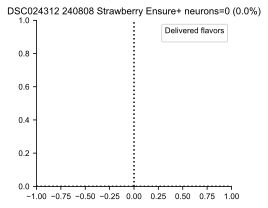

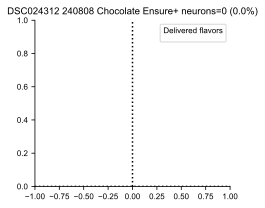

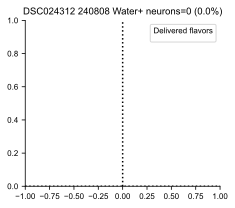

In [28]:
# auroc_P1D = cal_auroc(P1D_PETH, baseline_window=1,steps=20)
# auroc_P1C = cal_auroc(P1C_PETH, baseline_window=1,steps=20)
# auroc_P1  = cal_auroc(P1_PETH, baseline_window=1,steps=20)

# plt.imshow(auroc_P1D, aspect='auto')
# plt.show()

plt.figure(figsize=[3.5,3])
# P1D_idx_positive, idx_negative, idx_non = cell_class(auroc_P1D,window=2,threshold_sd=2)

sns.lineplot(data = np2df_long(P1D_PETH[P1D_idx_positive].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[0],errorbar='se',label=f"{flavor_dict['P1D']}")
sns.lineplot(data = np2df_long(P1C_PETH[P1D_idx_positive].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[1],errorbar='se',label=f"{flavor_dict['P1C']}")
sns.lineplot(data = np2df_long(P1_PETH[P1D_idx_positive].mean(axis=1)),  x='Time (sec)', y='zs-dff',color=my_color_map[2],errorbar='se',label=f"{flavor_dict['P1']}")

plt.title(f"{mouse_id} {date} {flavor_dict['P1D']}+ neurons={len(P1D_idx_positive)} ({len(P1D_idx_positive)/P1D_PETH.shape[0]*100:.1f}%)")
plt.legend(title='Delivered flavors')
plt.axvline(x=0,color='k',ls=':')
plt.axhline(y=0,color='k',ls=':')
plt.xlim(xmin=-1)
sns.despine()
plot_name = f"revision/3flavor_{mouse_id}_{date}_{flavor_dict['P1D']}_neuron_avg"
save_plot_pdf(plot_name)
# plt.tight_layout()


plt.figure(figsize=[3.5,3])
# P1D_idx_positive, idx_negative, idx_non = cell_class(auroc_P1C,window=2,threshold_sd=2)

sns.lineplot(data = np2df_long(P1D_PETH[P1C_idx_positive].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[0],errorbar='se',label=f"{flavor_dict['P1D']}")
sns.lineplot(data = np2df_long(P1C_PETH[P1C_idx_positive].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[1],errorbar='se',label=f"{flavor_dict['P1C']}")
sns.lineplot(data = np2df_long(P1_PETH[P1C_idx_positive].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[2],errorbar='se', label=f"{flavor_dict['P1']}")

plt.title(f"{mouse_id} {date} {flavor_dict['P1C']}+ neurons={len(P1C_idx_positive)} ({len(P1C_idx_positive)/P1D_PETH.shape[0]*100:.1f}%)")
plt.legend(title='Delivered flavors')
plt.axvline(x=0,color='k',ls=':')
plt.axhline(y=0,color='k',ls=':')
plt.xlim(xmin=-1)
sns.despine()
# plt.tight_layout()
plot_name = f'revision/3flavor_{mouse_id}_{date}_{flavor_dict["P1C"]}_neuron_avg'
save_plot_pdf(plot_name)


plt.figure(figsize=[3.5,3])
# P1D_idx_positive, idx_negative, idx_non = cell_class(auroc_P1C,window=2,threshold_sd=2)
sns.lineplot(data = np2df_long(P1D_PETH[P1_idx_positive].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[0],errorbar='se',label=f"{flavor_dict['P1D']}")
sns.lineplot(data = np2df_long(P1C_PETH[P1_idx_positive].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[1],errorbar='se',label=f"{flavor_dict['P1C']}")
sns.lineplot(data = np2df_long(P1_PETH[P1_idx_positive].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[2],errorbar='se', label=f"{flavor_dict['P1']}")

plt.title(f"{mouse_id} {date} {flavor_dict['P1']}+ neurons={len(P1_idx_positive)} ({len(P1_idx_positive)/P1D_PETH.shape[0]*100:.1f}%)")
plt.legend(title='Delivered flavors')
plt.axvline(x=0,color='k',ls=':')
plt.axhline(y=0,color='k',ls=':')
plt.xlim(xmin=-1)
sns.despine()
# plt.tight_layout()
plot_name = f'revision/3flavor_{mouse_id}_{date}_{flavor_dict["P1"]}_neuron_avg'
save_plot_pdf(plot_name)



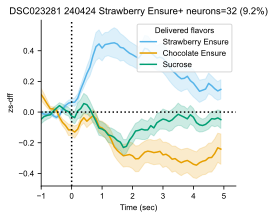

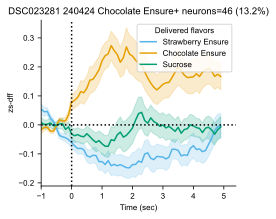

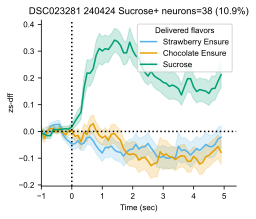

In [32]:
# auroc_P1D = cal_auroc(P1D_PETH, baseline_window=1,steps=20)
# auroc_P1C = cal_auroc(P1C_PETH, baseline_window=1,steps=20)
# auroc_P1  = cal_auroc(P1_PETH, baseline_window=1,steps=20)

# plt.imshow(auroc_P1D, aspect='auto')
# plt.show()

plt.figure(figsize=[3.5,3])
# P1D_idx_positive, idx_negative, idx_non = cell_class(auroc_P1D,window=2,threshold_sd=2)

sns.lineplot(data = np2df_long(P1D_PETH[P1D_idx_positive_filter].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[0],errorbar='se',label=f"{flavor_dict['P1D']}")
sns.lineplot(data = np2df_long(P1C_PETH[P1D_idx_positive_filter].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[1],errorbar='se',label=f"{flavor_dict['P1C']}")
sns.lineplot(data = np2df_long(P1_PETH[P1D_idx_positive_filter].mean(axis=1)),  x='Time (sec)', y='zs-dff',color=my_color_map[2],errorbar='se',label=f"{flavor_dict['P1']}")

plt.title(f"{mouse_id} {date} {flavor_dict['P1D']}+ neurons={len(P1D_idx_positive_filter)} ({len(P1D_idx_positive_filter)/P1D_PETH.shape[0]*100:.1f}%)")
plt.legend(title='Delivered flavors')
plt.axvline(x=0,color='k',ls=':')
plt.axhline(y=0,color='k',ls=':')
plt.xlim(xmin=-1)
sns.despine()
plot_name = f"revision/3flavor_{mouse_id}_{date}_{flavor_dict['P1D']}_neuron_avg_exclusive"
save_plot_pdf(plot_name)
# plt.tight_layout()


plt.figure(figsize=[3.5,3])
# P1D_idx_positive, idx_negative, idx_non = cell_class(auroc_P1C,window=2,threshold_sd=2)

sns.lineplot(data = np2df_long(P1D_PETH[P1C_idx_positive_filter].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[0],errorbar='se',label=f"{flavor_dict['P1D']}")
sns.lineplot(data = np2df_long(P1C_PETH[P1C_idx_positive_filter].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[1],errorbar='se',label=f"{flavor_dict['P1C']}")
sns.lineplot(data = np2df_long(P1_PETH[P1C_idx_positive_filter].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[2],errorbar='se', label=f"{flavor_dict['P1']}")

plt.title(f"{mouse_id} {date} {flavor_dict['P1C']}+ neurons={len(P1C_idx_positive_filter)} ({len(P1C_idx_positive_filter)/P1D_PETH.shape[0]*100:.1f}%)")
plt.legend(title='Delivered flavors')
plt.axvline(x=0,color='k',ls=':')
plt.axhline(y=0,color='k',ls=':')
plt.xlim(xmin=-1)
sns.despine()
# plt.tight_layout()
plot_name = f'revision/3flavor_{mouse_id}_{date}_{flavor_dict["P1C"]}_neuron_avg_exclusive'
save_plot_pdf(plot_name)


plt.figure(figsize=[3.5,3])
# P1D_idx_positive, idx_negative, idx_non = cell_class(auroc_P1C,window=2,threshold_sd=2)
sns.lineplot(data = np2df_long(P1D_PETH[P1_idx_positive_filter].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[0],errorbar='se',label=f"{flavor_dict['P1D']}")
sns.lineplot(data = np2df_long(P1C_PETH[P1_idx_positive_filter].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[1],errorbar='se',label=f"{flavor_dict['P1C']}")
sns.lineplot(data = np2df_long(P1_PETH[P1_idx_positive_filter].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[2],errorbar='se', label=f"{flavor_dict['P1']}")

plt.title(f"{mouse_id} {date} {flavor_dict['P1']}+ neurons={len(P1_idx_positive_filter)} ({len(P1_idx_positive_filter)/P1D_PETH.shape[0]*100:.1f}%)")
plt.legend(title='Delivered flavors')
plt.axvline(x=0,color='k',ls=':')
plt.axhline(y=0,color='k',ls=':')
plt.xlim(xmin=-1)
sns.despine()
# plt.tight_layout()
plot_name = f'revision/3flavor_{mouse_id}_{date}_{flavor_dict["P1"]}_neuron_avg_exclusive'
save_plot_pdf(plot_name)


46 56 53


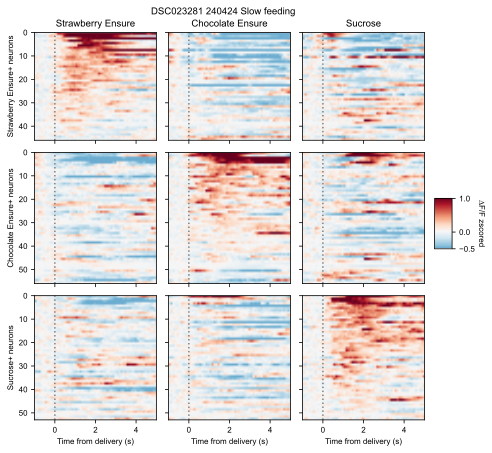

In [33]:
## heatmaps for responding neurons

print(len(P1D_idx_positive),len(P1C_idx_positive),len(P1_idx_positive))

vmin = -0.5
vmax = 1
midpoint = 0

norm = MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=midpoint)

extent = [-1,5,len(P1D_idx_positive),0]

fig, axes = plt.subplots(figsize=[7,7],nrows=3,ncols=3,sharex=True,sharey='row',gridspec_kw={'hspace':0.1,'wspace':0.1,'height_ratios':[len(P1D_idx_positive),len(P1C_idx_positive),len(P1_idx_positive)]})

isort_P1D = np.argsort(-P1D_PETH.mean(axis=1)[P1D_idx_positive,50:80].mean(axis=1))

mx = axes[0,0].imshow(P1D_PETH.mean(axis=1)[P1D_idx_positive,40:][isort_P1D], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')
axes[0,1].imshow(P1C_PETH.mean(axis=1)[P1D_idx_positive,40:][isort_P1D], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')
axes[0,2].imshow(P1_PETH.mean(axis=1)[P1D_idx_positive,40:][isort_P1D], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')

extent = [-1,5,len(P1C_idx_positive),0]

isort_P1C = np.argsort(-P1C_PETH.mean(axis=1)[P1C_idx_positive,50:80].mean(axis=1))

axes[1,0].imshow(P1D_PETH.mean(axis=1)[P1C_idx_positive,40:][isort_P1C], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')
axes[1,1].imshow(P1C_PETH.mean(axis=1)[P1C_idx_positive,40:][isort_P1C], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')
axes[1,2].imshow(P1_PETH.mean(axis=1) [P1C_idx_positive,40:][isort_P1C], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')

extent = [-1,5,len(P1_idx_positive),0]

isort_P1 = np.argsort(-P1_PETH.mean(axis=1)[P1_idx_positive,50:80].mean(axis=1))

axes[2,0].imshow(P1D_PETH.mean(axis=1)[P1_idx_positive,40:][isort_P1], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')
axes[2,1].imshow(P1C_PETH.mean(axis=1)[P1_idx_positive,40:][isort_P1], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')
axes[2,2].imshow(P1_PETH.mean(axis=1)[P1_idx_positive,40:][isort_P1], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')

axes[0,0].set_ylabel(f"{flavor_dict['P1D']}+ neurons")
axes[1,0].set_ylabel(f"{flavor_dict['P1C']}+ neurons")
axes[2,0].set_ylabel(f"{flavor_dict['P1']}+ neurons")

axes[2,0].set_xlabel('Time from delivery (s)')
axes[2,1].set_xlabel('Time from delivery (s)')
axes[2,2].set_xlabel('Time from delivery (s)')

for ax in axes.flatten():
    ax.axvline(x=0,ls=':',color='grey')

axes[0,0].set_title(f"{flavor_dict['P1D']}")
axes[0,1].set_title(f"{flavor_dict['P1C']}")
axes[0,2].set_title(f"{flavor_dict['P1']}")
fig.suptitle(f'{mouse_id} {date} Slow feeding',y=0.93)

## make side color bar with shrinking
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.45, 0.035, 0.1])
cbar_ax.get_yaxis().labelpad = 15
fig.colorbar(mx, cax=cbar_ax,ticks=[vmin,0,vmax])
cbar_ax.set_ylabel('∆F/F zscored', rotation=270,labelpad=10)

# plt.tight_layout()
plot_name = f'revision/3flavors_{mouse_id}_{date}_responding_neurons'
save_plot_pdf(plot_name)


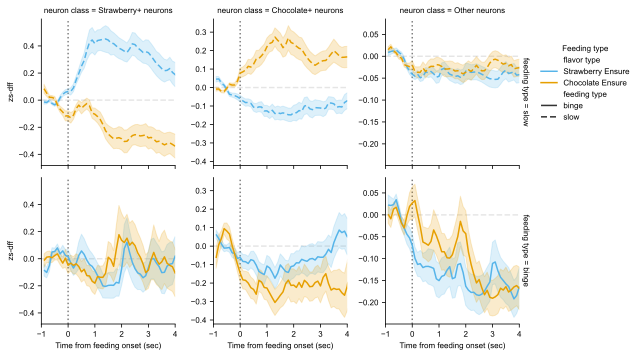

In [35]:
df_binge_P1D = np2df_long(binge_onset_ensure[P1D_idx_positive_filter].mean(axis=1))
df_binge_P1D['flavor type'] = f"{flavor_dict['P1D']}"
df_binge_P1D['feeding type'] = "binge"
df_binge_P1D['neuron class'] = f"{flavor_dict['P1D'].split(' ')[0]}+ neurons"

df_binge_P1C = np2df_long(binge_onset_ensure_diluted[P1D_idx_positive_filter].mean(axis=1))
df_binge_P1C['flavor type'] = f"{flavor_dict['P1C']}"
df_binge_P1C['feeding type'] = "binge"
df_binge_P1C['neuron class'] = f"{flavor_dict['P1D'].split(' ')[0]}+ neurons"

df_slow_P1D = np2df_long(P1D_PETH[P1D_idx_positive_filter].mean(axis=1))
df_slow_P1D['flavor type'] = f"{flavor_dict['P1D']}"
df_slow_P1D['feeding type'] = "slow"
df_slow_P1D['neuron class'] = f"{flavor_dict['P1D'].split(' ')[0]}+ neurons"

df_slow_P1C = np2df_long(P1C_PETH[P1D_idx_positive_filter].mean(axis=1))
df_slow_P1C['flavor type'] = f"{flavor_dict['P1C']}"
df_slow_P1C['feeding type'] = "slow"
df_slow_P1C['neuron class'] = f"{flavor_dict['P1D'].split(' ')[0]}+ neurons"

df_merge = pd.concat([df_binge_P1D,df_binge_P1C,df_slow_P1D,df_slow_P1C]).reset_index(drop=True)
# df_merge

df_binge_P1D = np2df_long(binge_onset_ensure[P1C_idx_positive_filter].mean(axis=1))
df_binge_P1D['flavor type'] = f"{flavor_dict['P1D']}"
df_binge_P1D['feeding type'] = "binge"
df_binge_P1D['neuron class'] = f"{flavor_dict['P1C'].split(' ')[0]}+ neurons"

df_binge_P1C = np2df_long(binge_onset_ensure_diluted[P1C_idx_positive_filter].mean(axis=1))
df_binge_P1C['flavor type'] = f"{flavor_dict['P1C']}"
df_binge_P1C['feeding type'] = "binge"
df_binge_P1C['neuron class'] = f"{flavor_dict['P1C'].split(' ')[0]}+ neurons"

df_slow_P1D = np2df_long(P1D_PETH[P1C_idx_positive_filter].mean(axis=1))
df_slow_P1D['flavor type'] = f"{flavor_dict['P1D']}"
df_slow_P1D['feeding type'] = "slow"
df_slow_P1D['neuron class'] = f"{flavor_dict['P1C'].split(' ')[0]}+ neurons"

df_slow_P1C = np2df_long(P1C_PETH[P1C_idx_positive_filter].mean(axis=1))
df_slow_P1C['flavor type'] = f"{flavor_dict['P1C']}"
df_slow_P1C['feeding type'] = "slow"
df_slow_P1C['neuron class'] = f"{flavor_dict['P1C'].split(' ')[0]}+ neurons"

df_merge = pd.concat([df_merge, df_binge_P1D,df_binge_P1C,df_slow_P1D,df_slow_P1C]).reset_index(drop=True)
# data = df_merge.copy()

other_idx = [i for i in range(binge_onset_ensure.shape[0]) if i not in P1D_idx_positive and i not in P1C_idx_positive]

df_binge_P1D = np2df_long(binge_onset_ensure[other_idx].mean(axis=1))
df_binge_P1D['flavor type'] = f"{flavor_dict['P1D']}"
df_binge_P1D['feeding type'] = "binge"
df_binge_P1D['neuron class'] = f"Other neurons"

df_binge_P1C = np2df_long(binge_onset_ensure_diluted[other_idx].mean(axis=1))
df_binge_P1C['flavor type'] = f"{flavor_dict['P1C']}"
df_binge_P1C['feeding type'] = "binge"
df_binge_P1C['neuron class'] = f"Other neurons"

df_slow_P1D = np2df_long(P1D_PETH[other_idx].mean(axis=1))
df_slow_P1D['flavor type'] = f"{flavor_dict['P1D']}"
df_slow_P1D['feeding type'] = "slow"
df_slow_P1D['neuron class'] = f"Other neurons"

df_slow_P1C = np2df_long(P1C_PETH[other_idx].mean(axis=1))
df_slow_P1C['flavor type'] = f"{flavor_dict['P1C']}"
df_slow_P1C['feeding type'] = "slow"
df_slow_P1C['neuron class'] = f"Other neurons"

# df_merge = pd.concat([df_merge, df_binge_P1D]).reset_index(drop=True)
df_merge = pd.concat([df_merge, df_binge_P1D,df_binge_P1C,df_slow_P1D,df_slow_P1C]).reset_index(drop=True)
data = df_merge.copy()

data = data[data['Time (sec)']>-1]
# title_name = f'Binge feeding vs slow feeding'

g = sns.relplot(data=data,x='Time (sec)',y='zs-dff',kind='line',hue='flavor type',row='feeding type',col='neuron class',
                style='feeding type',palette=my_color_map[0:3],row_order=['slow','binge'],
                height=2.5,aspect=1,errorbar='se',dashes=[(1,0),(4,2)],facet_kws=dict(legend_out=False,margin_titles=True,sharey='col')) #sharey='col'

g.set_xlabels('Time from feeding onset (sec)')
plt.xlim([-1,4])
# plt.ylim(ymin=-0.4)
g.refline(x=0,ls=':',color='k',alpha=0.5,zorder=-100)
g.refline(y=0,color='grey',alpha=0.2,zorder=-100)

g.set_titles("{row_name}+ neurons")
# g.set_ylabels("{row_name}+ neurons")

sns.move_legend(g,frameon=False,loc=(0,0),bbox_to_anchor=(1, 0.65),title='Feeding type')
plt.tight_layout()


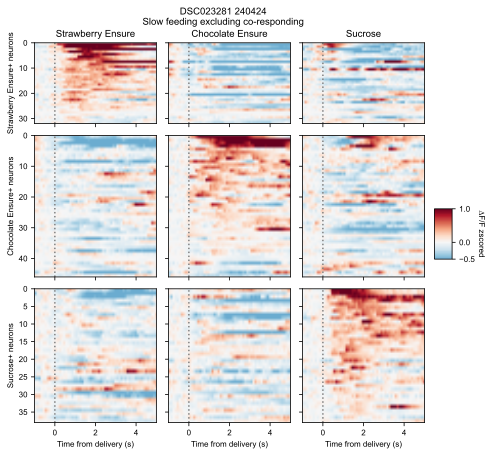

In [123]:
## heatmaps for responding neurons
## Only the exclusive ones

vmin = -0.5
vmax = 1
midpoint = 0

norm = MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=midpoint)

extent = [-1,5,len(P1D_idx_positive_filter),0]

fig, axes = plt.subplots(figsize=[7,7],nrows=3,ncols=3,sharex=True,sharey='row',gridspec_kw={'hspace':0.1,'wspace':0.1,'height_ratios':[len(P1D_idx_positive_filter),len(P1C_idx_positive),len(P1_idx_positive)]})

isort_P1D = np.argsort(-P1D_PETH.mean(axis=1)[P1D_idx_positive_filter,50:80].mean(axis=1))

mx = axes[0,0].imshow(P1D_PETH.mean(axis=1)[P1D_idx_positive_filter,40:][isort_P1D], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')
axes[0,1].imshow(P1C_PETH.mean(axis=1)[P1D_idx_positive_filter,40:][isort_P1D], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')
axes[0,2].imshow(P1_PETH.mean(axis=1)[P1D_idx_positive_filter,40:][isort_P1D], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')

extent = [-1,5,len(P1C_idx_positive_filter),0]

isort_P1C = np.argsort(-P1C_PETH.mean(axis=1)[P1C_idx_positive_filter,50:80].mean(axis=1))

axes[1,0].imshow(P1D_PETH.mean(axis=1)[P1C_idx_positive_filter,40:][isort_P1C], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')
axes[1,1].imshow(P1C_PETH.mean(axis=1)[P1C_idx_positive_filter,40:][isort_P1C], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')
axes[1,2].imshow(P1_PETH.mean(axis=1) [P1C_idx_positive_filter,40:][isort_P1C], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')

extent = [-1,5,len(P1_idx_positive_filter),0]

isort_P1 = np.argsort(-P1_PETH.mean(axis=1)[P1_idx_positive_filter,50:80].mean(axis=1))

axes[2,0].imshow(P1D_PETH.mean(axis=1)[P1_idx_positive_filter,40:][isort_P1], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')
axes[2,1].imshow(P1C_PETH.mean(axis=1)[P1_idx_positive_filter,40:][isort_P1], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')
axes[2,2].imshow(P1_PETH.mean(axis=1)[P1_idx_positive_filter,40:][isort_P1], aspect='auto',extent=extent,cmap='RdBu_r',norm=norm,interpolation='none')

axes[0,0].set_ylabel(f"{flavor_dict['P1D']}+ neurons")
axes[1,0].set_ylabel(f"{flavor_dict['P1C']}+ neurons")
axes[2,0].set_ylabel(f"{flavor_dict['P1']}+ neurons")

axes[2,0].set_xlabel('Time from delivery (s)')
axes[2,1].set_xlabel('Time from delivery (s)')
axes[2,2].set_xlabel('Time from delivery (s)')

for ax in axes.flatten():
    ax.axvline(x=0,ls=':',color='grey')

axes[0,0].set_title(f"{flavor_dict['P1D']}")
axes[0,1].set_title(f"{flavor_dict['P1C']}")
axes[0,2].set_title(f"{flavor_dict['P1']}")
fig.suptitle(f'{mouse_id} {date}\nSlow feeding excluding co-responding',y=0.95)

## make side color bar with shrinking
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.45, 0.035, 0.1])
cbar_ax.get_yaxis().labelpad = 15
fig.colorbar(mx, cax=cbar_ax,ticks=[vmin,0,vmax])
cbar_ax.set_ylabel('∆F/F zscored', rotation=270,labelpad=10)

# plt.tight_layout()
plot_name = f'revision/3flavors_{mouse_id}_{date}_responding_neurons_exclusive'
save_plot_pdf(plot_name)


In [400]:
# ## find overlaps
# P1D_P1C_idx     = [idx for idx in P1D_idx_positive if idx in P1C_idx_positive and idx not in P1_idx_positive]
# P1D_P1_idx      = [idx for idx in P1D_idx_positive if idx in P1_idx_positive and idx not in P1C_idx_positive]
# P1C_P1_idx      = [idx for idx in P1C_idx_positive if idx in P1_idx_positive and idx not in P1D_idx_positive]
# P1D_P1C_P1_idx  = [idx for idx in P1D_idx_positive if idx in P1_idx_positive and idx in P1C_idx_positive]



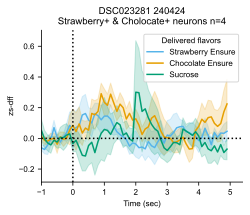

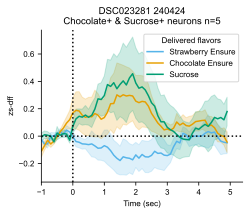

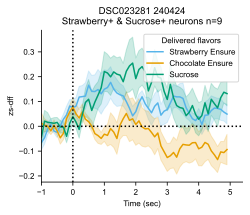

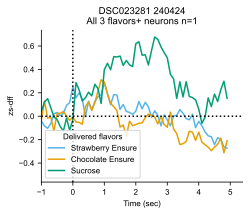

In [45]:
plt.figure(figsize=[3.5,3])

sns.lineplot(data = np2df_long(P1D_PETH[P1D_P1C_idx].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[0],errorbar='se',label=f"{flavor_dict['P1D']}")
sns.lineplot(data = np2df_long(P1C_PETH[P1D_P1C_idx].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[1],errorbar='se',label=f"{flavor_dict['P1C']}")
sns.lineplot(data = np2df_long(P1_PETH[P1D_P1C_idx].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[2],errorbar='se', label=f"{flavor_dict['P1']}")

plt.title(f"{mouse_id} {date}\nStrawberry+ & Cholocate+ neurons n={len(P1D_P1C_idx)}")
plt.legend(title='Delivered flavors')
plt.axvline(x=0,color='k',ls=':')
plt.axhline(y=0,color='k',ls=':')
plt.xlim(xmin=-1)
sns.despine()
plt.tight_layout()


plt.figure(figsize=[3.5,3])

sns.lineplot(data = np2df_long(P1D_PETH[P1C_P1_idx].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[0],errorbar='se',label=f"{flavor_dict['P1D']}")
sns.lineplot(data = np2df_long(P1C_PETH[P1C_P1_idx].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[1],errorbar='se',label=f"{flavor_dict['P1C']}")
sns.lineplot(data = np2df_long(P1_PETH[P1C_P1_idx].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[2],errorbar='se', label=f"{flavor_dict['P1']}")

plt.title(f"{mouse_id} {date}\nChocolate+ & Sucrose+ neurons n={len(P1C_P1_idx)}")
plt.legend(title='Delivered flavors')
plt.axvline(x=0,color='k',ls=':')
plt.axhline(y=0,color='k',ls=':')
plt.xlim(xmin=-1)
sns.despine()
plt.tight_layout()


plt.figure(figsize=[3.5,3])

sns.lineplot(data = np2df_long(P1D_PETH[P1D_P1_idx].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[0],errorbar='se',label=f"{flavor_dict['P1D']}")
sns.lineplot(data = np2df_long(P1C_PETH[P1D_P1_idx].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[1],errorbar='se',label=f"{flavor_dict['P1C']}")
sns.lineplot(data = np2df_long(P1_PETH[P1D_P1_idx].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[2],errorbar='se', label=f"{flavor_dict['P1']}")

plt.title(f"{mouse_id} {date}\nStrawberry+ & Sucrose+ neurons n={len(P1D_P1_idx)}")
plt.legend(title='Delivered flavors')
plt.axvline(x=0,color='k',ls=':')
plt.axhline(y=0,color='k',ls=':')
plt.xlim(xmin=-1)
sns.despine()
plt.tight_layout()


plt.figure(figsize=[3.5,3])

sns.lineplot(data = np2df_long(P1D_PETH[P1D_P1C_P1_idx].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[0],errorbar='se',label=f"{flavor_dict['P1D']}")
sns.lineplot(data = np2df_long(P1C_PETH[P1D_P1C_P1_idx].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[1],errorbar='se',label=f"{flavor_dict['P1C']}")
sns.lineplot(data = np2df_long(P1_PETH[P1D_P1C_P1_idx].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[2],errorbar='se', label=f"{flavor_dict['P1']}")

plt.title(f"{mouse_id} {date}\nAll 3 flavors+ neurons n={len(P1D_P1C_P1_idx)}")
plt.legend(title='Delivered flavors')
plt.axvline(x=0,color='k',ls=':')
plt.axhline(y=0,color='k',ls=':')
plt.xlim(xmin=-1)
sns.despine()
plt.tight_layout()


# plt.figure(figsize=[3.5,3])
# # P1D_idx_positive, idx_negative, idx_non = cell_class(auroc_P1C,window=2,threshold_sd=2)

# sns.lineplot(data = np2df_long(P1D_PETH[P1_idx_positive].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[0],errorbar='se',label='Strawberry Ensure')
# sns.lineplot(data = np2df_long(P1C_PETH[P1_idx_positive].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[1],errorbar='se',label='Chocolate Ensure')
# sns.lineplot(data = np2df_long(P1_PETH[P1_idx_positive].mean(axis=1)), x='Time (sec)', y='zs-dff',color=my_color_map[2],errorbar='se',label='Sucrose')

# plt.title(f"{mouse_id} {date} Sucrose+ neurons")
# plt.legend(title='Delivered flavors')
# plt.axvline(x=0,color='k',ls=':')
# plt.axhline(y=0,color='k',ls=':')
# plt.xlim(xmin=-1)
# sns.despine()
# plt.tight_layout()




In [47]:
# new_color_map =      ['#808080',
#                       '#56b4e9',
#                       '#e69f00',
#                       '#009e73',
#                       '#f0e442',
#                       '#0072b2',
#                       '#d55e00',
#                       '#cc79a7']

new_color_map =     ['#56b4e9',
                     '#f0e442',
                     '#e69f00',
                     '#0072b2',
                     '#009e73',
                     '#d55e00',
                     '#cc79a7',
                     '#B3B3B3',
                     ]
# convert to sns plotting rgb
new_color_map = sns.color_palette(new_color_map)



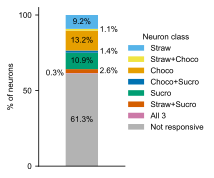

In [48]:
## bar plot of percentages

total_number = auroc_P1D.shape[0]

df_percent = pd.DataFrame([len(P1D_idx_positive_filter),len(P1D_P1C_idx),len(P1C_idx_positive_filter),len(P1C_P1_idx),len(P1_idx_positive_filter),len(P1D_P1_idx),len(P1D_P1C_P1_idx)],columns=['numbers'])
df_percent.loc[len(df_percent)] = total_number - df_percent.sum()
df_percent = df_percent.iloc[::-1]
df_percent/=total_number*0.01

label = ['Straw','Straw+Choco','Choco','Choco+Sucro','Sucro','Straw+Sucro','All 3','Not responsive']
# df_percent['class'] = label[::-1]
df_percent.index = label[::-1]

df_percent

ax = df_percent.T.plot(kind='bar',stacked=True,width=0.3,figsize=[3,2.5],color=new_color_map[::-1],legend='reverse')#,color=sns.color_palette(new_color)),legend='reverse'
# ax.legend(loc=[0.9,0.5],'reversed')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Neuron class', loc=[1,0.2],frameon=False)

for idx, (number,height) in enumerate(zip(df_percent['numbers'],df_percent.cumsum()['numbers'])):
    height -= number/2
    if idx in [2,4,6]:
        ax.text(x=0.25,y=height,s=f'{number:.1f}%',ha='center',va='center')
    elif idx ==1:
        ax.text(x=-0.25,y=height,s=f'{number:.1f}%',ha='center',va='center')
    else:
        ax.text(x=0,y=height,s=f'{number:.1f}%',ha='center',va='center')

plt.yticks([0,50,100])
plt.xticks([])
plt.ylabel('% of neurons')
sns.despine()
plt.tight_layout()
# print(df_percent)

plot_name = f'revision/3flavors_{mouse_id}_{date}_percentage'
save_plot_pdf(plot_name)

IndexError: index 70 is out of bounds for axis 0 with size 66

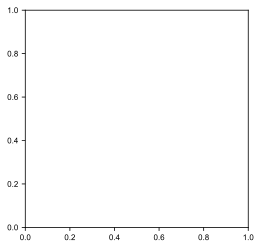

In [462]:
## check what is inside prop files, see if we can get xy coordinates

df_props = pd.read_csv(f'/Users/hunglo/Documents/inscopix_csv/2024_aPC/ca2_csv/{mouse_id}{date}_celltraces-props.csv')
df_props = df_props[df_props['Status']=='accepted'].reset_index(drop=True)

cell_names = df_props['Name'].values

# plt.scatter(df_props['CentroidX'],-df_props['CentroidY'])
fig,ax = plt.subplots(figsize=[4,4])
ax.scatter(df_props[~df_props['Name'].isin(list(cell_names[P1D_idx_positive])+list(cell_names[P1C_idx_positive])+list(cell_names[P1_idx_positive]))]['CentroidX'],
           df_props[~df_props['Name'].isin(list(cell_names[P1D_idx_positive])+list(cell_names[P1C_idx_positive])+list(cell_names[P1_idx_positive]))]['CentroidY'],label='other neurons',color='grey',alpha=0.5,edgecolors='w')
ax.scatter(df_props[df_props['Name'].isin(cell_names[P1D_idx_positive])]['CentroidX'],
           df_props[df_props['Name'].isin(cell_names[P1D_idx_positive])]['CentroidY'],label='Strawberry',color=my_color_map[0],edgecolors='w')
ax.scatter(df_props[df_props['Name'].isin(cell_names[P1C_idx_positive])]['CentroidX'],
           df_props[df_props['Name'].isin(cell_names[P1C_idx_positive])]['CentroidY'],label='Chocolate',color=my_color_map[1],edgecolors='w')
ax.scatter(df_props[df_props['Name'].isin(cell_names[P1_idx_positive])]['CentroidX'],
           df_props[df_props['Name'].isin(cell_names[P1_idx_positive])]['CentroidY'],label='Sucrose',color=my_color_map[2],edgecolors='w')
ax.legend()
ax.set_title(f'cell maps {mouse_id} {date}')
ax.plot([0,75],[110,200])
plt.gca().invert_yaxis()
ax.set_box_aspect(1)
sns.despine()
plt.tight_layout()



In [463]:
def distance_to_line(df_props, p1, p2):
    df_props.reset_index(drop=True,inplace=True)
    p1 = np.asarray(p1)
    p2 = np.asarray(p2)
    d = []
    for i in range(len(df_props)):
        p3 = np.array([df_props.loc[i,'CentroidX'],df_props.loc[i,'CentroidY']])
        d.append(np.abs(np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1)))
    return d

p1 = np.array([0,110])
p2 = np.array([75,200])
d = distance_to_line(df_props=df_props,p1=p1,p2=p2)
df_props['distance'] =d

df_props

Name    Status  ColorR  ColorG  ColorB  CentroidX  CentroidY  \
0   C000  accepted     255     255     255         26         35   
1   C001  accepted     255     255     255        128         48   
2   C002  accepted     255     255     255        123         65   
3   C004  accepted     255     255     255        118         61   
4   C005  accepted     255     255     255        120         20   
..   ...       ...     ...     ...     ...        ...        ...   
61  C104  accepted     255     255     255         46        168   
62  C105  accepted     255     255     255         26        163   
63  C106  accepted     255     255     255         22        159   
64  C114  accepted     255     255     255        190        119   
65  C116  accepted     255     255     255         52        166   

    NumComponents      Size  ActiveSegment0    distance  
0               1   7.28011               1   67.987583  
1               1   6.70820               1  138.023757  
2               1   6.32456               1  123.299515  
3               1   7.28011               1  122.019147  
4               1   8.06226               1  149.803150  
..            ...       ...             ...         ...  
61              1   8.60233               1    1.792516  
62              1   8.06226               1   13.956020  
63              2  10.04990               1   14.468167  
64              1   7.21110               1  140.200384  
65              2   5.09902               1    4.097180  

[66 rows x 11 columns]

24.192761694577435

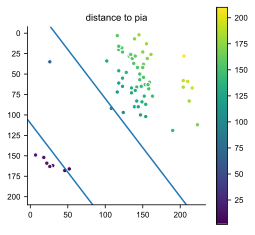

In [465]:
fig,ax = plt.subplots(figsize=[4,4])
plt.scatter(df_props['CentroidX'],df_props['CentroidY'],c=df_props['distance'],s=20,edgecolors='w')
plt.colorbar()

p1 = np.array([0,110])
p2 = np.array([75,200])

# ax.plot([0,75],[110,200])
# ax.plot([p1[0],p2[0]],[p1[1],p2[1]])
# p1+=50
# p2+=50
# ax.plot([p1[0],p2[0]],[p1[1],p2[1]])
ax.axline(p2, slope=1.2)

p3 = np.array([200,200])
ax.axline(p3, slope=1.2)

# p3 = np.array([200,220])
# ax.axline(p3, slope=1.2,color='C1')

plt.gca().invert_yaxis()
ax.set_box_aspect(1)
sns.despine()
plt.title('distance to pia')
# plt.tight_layout()

p2 = p2 = np.array([75,200])
p1 = np.array(p2[0]+1,p2[1]+1.2)
p3 = np.array([200,200])
p3 = np.array([100,100])

np.abs(np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1))


In [441]:
p2 = p2 = np.array([75,200])
p1 = np.array(p2[0]+1,p2[1]+1.2)
p3 = np.array([200,200])
p3 = np.array([100,100])

np.abs(np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1))


24.192761694577435

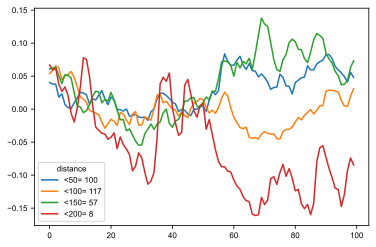

In [411]:
plt.plot(P1D_PETH[df_props[df_props['distance']<50].index].mean(axis=(0,1)),label=f"<50= {len(df_props[df_props['distance']<50])}")
plt.plot(P1D_PETH[df_props[(df_props['distance']>50) & (df_props['distance']<100)].index].mean(axis=(0,1)),label=f"<100= {len(df_props[(df_props['distance']>50) & (df_props['distance']<100)])}")
plt.plot(P1D_PETH[df_props[(df_props['distance']>100) & (df_props['distance']<150)].index].mean(axis=(0,1)),label=f"<150= {len(df_props[(df_props['distance']>100) & (df_props['distance']<150)])}")
plt.plot(P1D_PETH[df_props[(df_props['distance']>150) & (df_props['distance']<200)].index].mean(axis=(0,1)),label=f"<200= {len(df_props[(df_props['distance']>150) & (df_props['distance']<200)])}")
plt.legend(title='distance')
# plt.xlim(xmin=40)


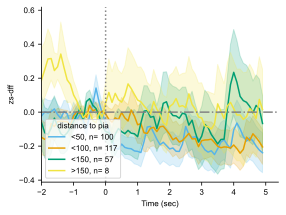

In [429]:
plt.figure(figsize=[4,3])

sns.lineplot(data=np2df_long(binge_onset_ensure[df_props[df_props['distance']<50].index].mean(axis=1)),x='Time (sec)',y='zs-dff',
             label=f"<50, n= {len(df_props[df_props['distance']<50])}",color=my_color_map[0],errorbar='se')
sns.lineplot(data=np2df_long(binge_onset_ensure[df_props[(df_props['distance']>50) & (df_props['distance']<100)].index].mean(axis=1)),x='Time (sec)',y='zs-dff',
             label=f"<100, n= {len(df_props[(df_props['distance']>50) & (df_props['distance']<100)])}",color=my_color_map[1],errorbar='se')
sns.lineplot(data=np2df_long(binge_onset_ensure[df_props[(df_props['distance']>100) & (df_props['distance']<150)].index].mean(axis=1)),x='Time (sec)',y='zs-dff',
             label=f"<150, n= {len(df_props[(df_props['distance']>100) & (df_props['distance']<150)])}",color=my_color_map[2],errorbar='se')
sns.lineplot(data=np2df_long(binge_onset_ensure[df_props[(df_props['distance']>150) & (df_props['distance']<200)].index].mean(axis=1)),x='Time (sec)',y='zs-dff',
             label=f">150, n= {len(df_props[(df_props['distance']>150) & (df_props['distance']<200)])}",color=my_color_map[3],errorbar='se')

plt.legend(title='distance to pia',loc=3)
plt.axvline(x=0,ls=':',color='grey')
plt.axhline(y=0,ls='-.',color='grey')
plt.xlim(xmin=-2)
# plt.ylim([-0.4,0.2])
sns.despine()
plt.tight_layout()


In [417]:
bins = np.arange(0, 201, 70)
bins
bins = np.arange(0, 251, 125)
bins

array([  0, 125, 250])

In [418]:
separation_line = 125
bins = np.arange(0, 251, separation_line)
labels = ['superficial','deep']

df_props['abs_dist'] = pd.cut(df_props.distance,
                            bins=bins, 
                            labels=labels, 
                            right=True, 
                            include_lowest=True)

df_props

Name    Status  ColorR  ColorG  ColorB  CentroidX  CentroidY  \
0    C000  accepted     255     255     255         48         48   
1    C001  accepted     255     255     255         42         30   
2    C002  accepted     255     255     255         43         35   
3    C003  accepted     255     255     255         50         40   
4    C004  accepted     255     255     255         23         47   
..    ...       ...     ...     ...     ...        ...        ...   
277  C293  accepted     255     255     255        232        192   
278  C295  accepted     255     255     255         69        151   
279  C296  accepted     255     255     255         68        128   
280  C297  accepted     255     255     255         68        124   
281  C298  accepted     255     255     255         28         86   

     NumComponents      Size  ActiveSegment0    distance     abs_dist  
0                1   8.54400               1   76.566054  superficial  
1                1  12.53000               1   83.480046  superficial  
2                1  11.18030               1   81.047345  superficial  
3                1   8.94427               1   83.223972  superficial  
4                1  11.40180               1   58.000707  superficial  
..             ...       ...             ...         ...          ...  
277              1  11.70470               1  125.732216         deep  
278              1   8.54400               1   26.759708  superficial  
279              1   9.21954               1   40.715728  superficial  
280              1   9.21954               1   43.276465  superficial  
281              2   9.05539               1   36.874621  superficial  

[282 rows x 12 columns]

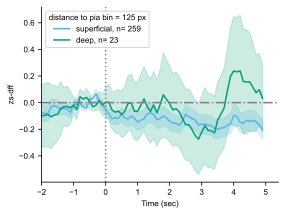

In [419]:
# binge_onset_ensure[df_props[df_props['bins']=='superficial'].index]


plt.figure(figsize=[4,3])
sns.lineplot(data=np2df_long(binge_onset_ensure[df_props[df_props['abs_dist']=='superficial'].index].mean(axis=1)),x='Time (sec)',y='zs-dff',
             label=f"superficial, n= {len(binge_onset_ensure[df_props[df_props['abs_dist']=='superficial'].index])}",color=my_color_map[0],errorbar='se')
# sns.lineplot(data=np2df_long(binge_onset_ensure[df_props[df_props['abs_dist']=='middle'].index].mean(axis=1)),x='Time (sec)',y='zs-dff',
            #  label=f"middle, n= {len(binge_onset_ensure[df_props[df_props['abs_dist']=='middle'].index])}",color=my_color_map[1],errorbar='se')
sns.lineplot(data=np2df_long(binge_onset_ensure[df_props[df_props['abs_dist']=='deep'].index].mean(axis=1)),x='Time (sec)',y='zs-dff',
             label=f"deep, n= {len(binge_onset_ensure[df_props[df_props['abs_dist']=='deep'].index])}",color=my_color_map[2],errorbar='se')

plt.legend(title=f'distance to pia bin = {separation_line} px',loc=2)
plt.axvline(x=0,ls=':',color='grey')
plt.axhline(y=0,ls='-.',color='grey')
plt.xlim(xmin=-2)
# plt.ylim([-0.15,0.3])
sns.despine()
plt.tight_layout()


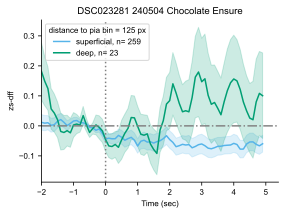

In [428]:
## P1C (named diluted ensure, but actually chocolate here)

plt.figure(figsize=[4,3])
sns.lineplot(data=np2df_long(binge_onset_ensure_diluted[df_props[df_props['abs_dist']=='superficial'].index].mean(axis=1)),x='Time (sec)',y='zs-dff',
             label=f"superficial, n= {len(binge_onset_ensure_diluted[df_props[df_props['abs_dist']=='superficial'].index])}",color=my_color_map[0],errorbar='se')
# sns.lineplot(data=np2df_long(binge_onset_ensure[df_props[df_props['abs_dist']=='middle'].index].mean(axis=1)),x='Time (sec)',y='zs-dff',
            #  label=f"middle, n= {len(binge_onset_ensure[df_props[df_props['abs_dist']=='middle'].index])}",color=my_color_map[1],errorbar='se')
sns.lineplot(data=np2df_long(binge_onset_ensure_diluted[df_props[df_props['abs_dist']=='deep'].index].mean(axis=1)),x='Time (sec)',y='zs-dff',
             label=f"deep, n= {len(binge_onset_ensure_diluted[df_props[df_props['abs_dist']=='deep'].index])}",color=my_color_map[2],errorbar='se')

plt.legend(title=f'distance to pia bin = {separation_line} px',loc=2)
plt.title(f"{mouse_id} {date} {flavor_dict['P1C']}")
plt.axvline(x=0,ls=':',color='grey')
plt.axhline(y=0,ls='-.',color='grey')
plt.xlim(xmin=-2)
# plt.ylim([-0.15,0.3])
sns.despine()
plt.tight_layout()



In [424]:
tertiles = pd.qcut(df_props['distance'], 3, labels=['superficial','middle','deep'])
df_props = df_props.assign(Tertiles=tertiles.values)
df_props


Name    Status  ColorR  ColorG  ColorB  CentroidX  CentroidY  \
0    C000  accepted     255     255     255         48         48   
1    C001  accepted     255     255     255         42         30   
2    C002  accepted     255     255     255         43         35   
3    C003  accepted     255     255     255         50         40   
4    C004  accepted     255     255     255         23         47   
..    ...       ...     ...     ...     ...        ...        ...   
277  C293  accepted     255     255     255        232        192   
278  C295  accepted     255     255     255         69        151   
279  C296  accepted     255     255     255         68        128   
280  C297  accepted     255     255     255         68        124   
281  C298  accepted     255     255     255         28         86   

     NumComponents      Size  ActiveSegment0    distance     abs_dist  \
0                1   8.54400               1   76.566054  superficial   
1                1  12.53000               1   83.480046  superficial   
2                1  11.18030               1   81.047345  superficial   
3                1   8.94427               1   83.223972  superficial   
4                1  11.40180               1   58.000707  superficial   
..             ...       ...             ...         ...          ...   
277              1  11.70470               1  125.732216         deep   
278              1   8.54400               1   26.759708  superficial   
279              1   9.21954               1   40.715728  superficial   
280              1   9.21954               1   43.276465  superficial   
281              2   9.05539               1   36.874621  superficial   

        Tertiles  
0         middle  
1           deep  
2           deep  
3           deep  
4         middle  
..           ...  
277         deep  
278  superficial  
279  superficial  
280  superficial  
281  superficial  

[282 rows x 13 columns]

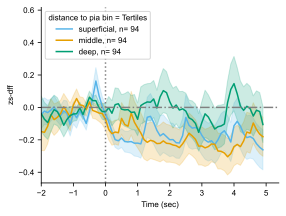

In [443]:

plt.figure(figsize=[4,3])
sns.lineplot(data=np2df_long(binge_onset_ensure[df_props[df_props['Tertiles']=='superficial'].index].mean(axis=1)),x='Time (sec)',y='zs-dff',
             label=f"superficial, n= {len(binge_onset_ensure[df_props[df_props['Tertiles']=='superficial'].index])}",color=my_color_map[0],errorbar='se')
sns.lineplot(data=np2df_long(binge_onset_ensure[df_props[df_props['Tertiles']=='middle'].index].mean(axis=1)),x='Time (sec)',y='zs-dff',
             label=f"middle, n= {len(binge_onset_ensure[df_props[df_props['Tertiles']=='middle'].index])}",color=my_color_map[1],errorbar='se')
sns.lineplot(data=np2df_long(binge_onset_ensure[df_props[df_props['Tertiles']=='deep'].index].mean(axis=1)),x='Time (sec)',y='zs-dff',
             label=f"deep, n= {len(binge_onset_ensure[df_props[df_props['Tertiles']=='deep'].index])}",color=my_color_map[2],errorbar='se')

plt.legend(title='distance to pia bin = Tertiles',loc=2)
plt.axvline(x=0,ls=':',color='grey')
plt.axhline(y=0,ls='-.',color='grey')
plt.xlim(xmin=-2)
# plt.ylim([-0.25,0.2])
sns.despine()
plt.tight_layout()


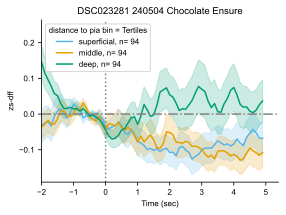

In [444]:
## chocolate (P1C)
plt.figure(figsize=[4,3])
sns.lineplot(data=np2df_long(binge_onset_ensure_diluted[df_props[df_props['Tertiles']=='superficial'].index].mean(axis=1)),x='Time (sec)',y='zs-dff',
             label=f"superficial, n= {len(binge_onset_ensure_diluted[df_props[df_props['Tertiles']=='superficial'].index])}",color=my_color_map[0],errorbar='se')
sns.lineplot(data=np2df_long(binge_onset_ensure_diluted[df_props[df_props['Tertiles']=='middle'].index].mean(axis=1)),x='Time (sec)',y='zs-dff',
             label=f"middle, n= {len(binge_onset_ensure_diluted[df_props[df_props['Tertiles']=='middle'].index])}",color=my_color_map[1],errorbar='se')
sns.lineplot(data=np2df_long(binge_onset_ensure_diluted[df_props[df_props['Tertiles']=='deep'].index].mean(axis=1)),x='Time (sec)',y='zs-dff',
             label=f"deep, n= {len(binge_onset_ensure_diluted[df_props[df_props['Tertiles']=='deep'].index])}",color=my_color_map[2],errorbar='se')

plt.legend(title='distance to pia bin = Tertiles',loc=2)
plt.title(f"{mouse_id} {date} {flavor_dict['P1C']}")
plt.axvline(x=0,ls=':',color='grey')
plt.axhline(y=0,ls='-.',color='grey')
plt.xlim(xmin=-2)
# plt.ylim([-0.25,0.2])
sns.despine()
plt.tight_layout()


In [296]:
pd.cut(df_props['distance'],3)

0      (70.762, 127.055]
1      (70.762, 127.055]
2       (14.299, 70.762]
3      (70.762, 127.055]
4       (14.299, 70.762]
             ...        
344     (14.299, 70.762]
345     (14.299, 70.762]
346     (14.299, 70.762]
347    (70.762, 127.055]
348    (70.762, 127.055]
Name: distance, Length: 349, dtype: category
Categories (3, interval[float64, right]): [(14.299, 70.762] < (70.762, 127.055] < (127.055, 183.349]]

1.414213562373095


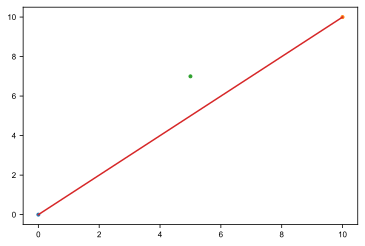

In [210]:
import numpy as np
p1=np.array([0,0])
p2=np.array([10,10])
p3=np.array([5,7])
d=np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1)
print(d)

plt.plot(p1[0],p1[1],marker='.')
plt.plot(p2[0],p2[1],marker='.')
plt.plot(p3[0],p3[1],marker='.')

plt.plot([p1[0],p2[0]],[p1[1],p2[1]])

In [187]:
df_props[['CentroidX','CentroidY']].values

for x,y in df_props[['CentroidX','CentroidY']].values:
    # print(x,y)
    


42 38
68 62
46 68
63 69
53 68
65 50
51 60
67 6
22 37
48 28
56 49
57 41
37 24
48 4
64 58
46 60
42 33
45 42
60 64
49 35
59 55
39 45
38 39
41 68
68 66
97 25
84 38
92 42
71 65
107 47
108 63
83 30
78 55
73 29
80 49
126 66
71 40
124 34
73 48
120 43
116 35
87 22
112 43
93 25
98 21
107 56
105 29
94 22
102 64
106 21
109 29
99 47
99 53
75 65
110 18
99 58
93 55
99 56
155 60
152 53
133 57
138 68
147 33
130 48
146 61
139 39
160 57
138 54
58 116
46 126
65 97
63 113
50 109
65 103
38 80
41 111
68 115
57 79
55 83
56 103
36 95
38 88
42 92
66 125
58 90
36 104
61 74
46 82
21 80
22 94
50 73
47 112
41 122
50 99
57 121
39 75
60 97
51 120
56 113
60 108
66 109
43 97
65 89
45 108
64 119
61 83
49 86
21 103
62 126
52 81
45 77
41 84
53 94
45 119
38 116
42 103
50 105
48 92
52 89
33 118
67 83
55 98
55 110
39 108
35 89
63 93
53 117
49 116
68 112
62 117
56 73
23 86
44 88
39 98
61 100
61 111
47 101
103 115
80 108
86 123
72 121
76 111
70 90
126 95
83 100
88 103
91 94
111 83
100 119
103 85
124 71
85 78
80 114
71 79
79 12

In [810]:
### try svm
# P1D_mean = P1D_PETH[:,:,50:70].max(axis=2)
# P1C_mean = P1C_PETH[:,:,50:70].max(axis=2)
# P1_mean  = P1_PETH[:,:,50:70].max(axis=2)

# P1D_mean = P1D_PETH[:,:,50:70].mean(axis=2)
# P1C_mean = P1C_PETH[:,:,50:70].mean(axis=2)
# P1_mean  = P1_PETH[:,:,50:70].mean(axis=2)

# P1D_mean = P1D_PETH[:,:,50:60].mean(axis=2) - P1D_PETH[:,:,40:50].mean(axis=2)
# P1C_mean = P1C_PETH[:,:,50:60].mean(axis=2) - P1C_PETH[:,:,40:50].mean(axis=2)
# P1_mean  = P1_PETH[:,:,50:60].mean(axis=2)  - P1_PETH[:,:,40:50].mean(axis=2)

P1D_mean = np.trapz(P1D_PETH[:,:,50:80],dx=0.1)
P1C_mean = np.trapz(P1C_PETH[:,:,50:80],dx=0.1)
P1_mean  = np.trapz(P1_PETH[:,:,50:80],dx=0.1)

df_P1D = pd.DataFrame([P1D_mean][0].T)
df_P1C = pd.DataFrame([P1C_mean][0].T)
df_P1  = pd.DataFrame([P1_mean][0].T)

flavor_list = [f'{flavor_dict["P1D"]}']*len(df_P1D) + [f'{flavor_dict["P1C"]}']*len(df_P1C) + [f'{flavor_dict["P1"]}']*len(df_P1)
flavor_list

target_list = [0]*len(df_P1D) + [1]*len(df_P1C) + [2]*len(df_P1)

df_svm = pd.concat([df_P1D,df_P1C,df_P1])
df_svm['flavors'] = flavor_list
df_svm['target']  = target_list
df_svm = df_svm.reset_index(drop=True)
df_svm.shape


## drop one flavor just to check
## remove one flavar

three_flavors = 0

if not three_flavors:
    removed_flavor = 'P1D'

    df_svm.drop(df_svm[df_svm['flavors']==flavor_dict[removed_flavor]].index,inplace=True)
    print(f'removed flavor = {flavor_dict[removed_flavor]}')
    df_svm
else:
    print('do 3 flavor decoding')

removed flavor = Strawberry Ensure


In [811]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import ShuffleSplit
# from sklearn import preprocessing
# from sklearn.pipeline import make_pipeline

def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

scores_svm_loop, scores_svm_shuffle_loop, scores_rfc_loop,scores_rfc_shuffle_loop = [],[],[],[]

loops = 3

for i in range(loops):

    X = df_svm.drop(['flavors','target'],axis=1)
    y = df_svm['target']
    class_names = df_svm['flavors']

    # Split the data into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify = y, test_size=0.25)

    # clf_svm = make_pipeline(preprocessing.StandardScaler(), SVC(C=0.1))

    clf_svm = SVC(kernel='linear',C=1) # linear
    clf_rfc = RandomForestClassifier()

    cv = 6
    scores_svm = cross_val_score(clf_svm, X, y, cv=cv)
    scores_rfc = cross_val_score(clf_rfc, X, y, cv=cv)

    ## Now the same but shuffle
    X = df_svm.drop(['flavors','target'],axis=1)
    y = df_svm['target'].sample(frac=1) # shuffle lables
    # class_names = df_svm['flavors']

    # Split the data into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify = y)

    clf_svm = SVC(kernel='linear')
    clf_rfc = RandomForestClassifier()

    scores_svm_shuffle = cross_val_score(clf_svm, X, y, cv=cv)
    scores_rfc_shuffle = cross_val_score(clf_rfc, X, y, cv=cv)

    scores_svm_loop.append(scores_svm.mean())
    scores_rfc_loop.append(scores_rfc.mean())
    scores_svm_shuffle_loop.append(scores_svm_shuffle.mean())
    scores_rfc_shuffle_loop.append(scores_rfc_shuffle.mean())

    # scores_svm_loop = np.append(scores_svm_loop, scores_svm)
    # scores_rfc_loop = np.append(scores_rfc_loop, scores_rfc)
    # scores_svm_shuffle_loop = np.append(scores_svm_shuffle_loop, scores_svm_shuffle)
    # scores_rfc_shuffle_loop = np.append(scores_rfc_shuffle_loop, scores_rfc_shuffle)

scores_df = pd.DataFrame(np.concatenate([scores_svm_loop,scores_svm_shuffle_loop,scores_rfc_loop,scores_rfc_shuffle_loop]),columns=['scores'])
scores_df['classifier'] = ['svm']*2*loops+['random forest']*2*loops
scores_df['type']  = ['data']*loops+['shuffle']*loops+['data']*loops+['shuffle']*loops
scores_df

## if storage each data points

# scores_df = pd.DataFrame(np.concatenate([scores_svm_loop,
#                                          scores_svm_shuffle_loop,
#                                          scores_rfc_loop,
#                                          scores_rfc_shuffle_loop]),columns=['scores'])

# scores_df['classifier'] = ['svm']*2*cv*loops+['random forest']*2*cv*loops
# scores_df['type']  = ['data']*cv*loops+['shuffle']*cv*loops+['data']*cv*loops+['shuffle']*cv*loops
# scores_df['loop']  = flatten_extend([[str(loop+1)]*cv for loop in range(loops)])*4 # 4 is for 4 classifiers (svm and rfc and their shuffles)
# scores_df['cv']    = [str(c+1) for c in range(cv)]*loops*4

scores_df

ValueError: 
All the 6 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/pynapple/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/pynapple/lib/python3.9/site-packages/sklearn/svm/_base.py", line 182, in fit
    y = self._validate_targets(y)
  File "/opt/anaconda3/envs/pynapple/lib/python3.9/site-packages/sklearn/svm/_base.py", line 739, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class


IndexError: index 1 is out of bounds for axis 0 with size 1

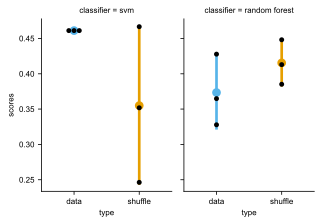

In [812]:
## plot decoder results

# g = sns.catplot(scores_df,x='type',y='scores',col='classifier',kind='box',aspect=0.75,height=4,width=0.5,palette=my_color_map)
g = sns.catplot(scores_df,x='type',y='scores',col='classifier',kind='point',aspect=0.75,height=3,palette=my_color_map,errorbar=("sd"),dodge=True)
# g = sns.catplot(scores_df,x='type',y='scores',col='classifier',kind='strip',aspect=0.75,height=4,palette=my_color_map)
g.map(sns.swarmplot, 'type', 'scores', color='k', order=sorted(scores_df.type.unique()))
g.fig.subplots_adjust(top=0.95) # adjust the Figure in rp

## if 3 flavors

if three_flavors:
    g.fig.suptitle(f'{mouse_id} {date} slow feeding\n3 flavors decoding: {df_svm["flavors"].unique()[0]} vs {df_svm["flavors"].unique()[1]} vs {df_svm["flavors"].unique()[2]}')
    g.refline(y=1/3, ls=':')
else:
    g.fig.suptitle(f'{mouse_id} {date} slow feeding\n2 flavors decoding: {df_svm["flavors"].unique()[0]} vs {df_svm["flavors"].unique()[1]}')
    g.refline(y=0.5, ls=':')
# plt.ylim([0.3,0.9])
plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# import some data to play with
# iris = datasets.load_iris()
X = df_svm.drop(['flavors','target'],axis=1)
y = df_svm['target']
class_names = df_svm['flavors']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear").fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
iris.target_names

In [ ]:
pd.DataFrame(data=np.array(ensure_binge_onset_time_list).reshape(-1), columns=['start'])

In [ ]:
plt.plot(df_z.mean(axis=1)[0:]*2.5)
ymax = df_z.mean(axis=1)[0:].max()
plt.eventplot([P1D_time,P1C_time,P1_time],lineoffsets=[ymax+3,ymax+2,ymax+1],color=['C0','C1','C3'],linelengths=1,linewidths=1)

plt.legend(['Straw. Ensure','Choco. Ensure','Sucrose'],loc=[0.625,0.9],frameon=False)



In [ ]:
isort = np.argsort(-df_z[P1D_time[4]:P1D_time[4]+2].mean(axis=0))
df_z[df_z.columns[isort]]
plt.imshow(df_z[df_z.columns[isort]].T,aspect='auto',vmin=vmin,vmax=vmax)